In [503]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
#ignore harmless warnings
import warnings 
warnings.filterwarnings('ignore')

In [504]:
data = pd.read_excel(r"C:\Users\SHIVA KUMAR\Documents\Life_turn\Data_Science\AI_Project- 2(Clusters)\World_development_mesurement (1) (1).xlsx")
data.head()

Birth Rate Business Tax Rate  CO2 Emissions       Country  \
0       0.020               NaN        87931.0       Algeria   
1       0.050               NaN         9542.0        Angola   
2       0.043               NaN         1617.0         Benin   
3       0.027               NaN         4276.0      Botswana   
4       0.046               NaN         1041.0  Burkina Faso   

   Days to Start Business  Ease of Business  Energy Usage              GDP  \
0                     NaN               NaN       26998.0  $54,790,058,957   
1                     NaN               NaN        7499.0   $9,129,594,819   
2                     NaN               NaN        1983.0   $2,359,122,303   
3                     NaN               NaN        1836.0   $5,788,311,645   
4                     NaN               NaN           NaN   $2,610,959,139   

   Health Exp % GDP Health Exp/Capita  ...  Life Expectancy Male  \
0             0.035               $60  ...                  67.0   
1             0.034               $22  ...                  44.0   
2             0.043               $15  ...                  53.0   
3             0.047              $152  ...                  49.0   
4             0.051               $12  ...                  49.0   

   Mobile Phone Usage  Number of Records  Population 0-14  Population 15-64  \
0                 0.0                  1            0.342             0.619   
1                 0.0                  1            0.476             0.499   
2                 0.0                  1            0.454             0.517   
3                 0.1                  1            0.383             0.587   
4                 0.0                  1            0.468             0.505   

   Population 65+  Population Total  Population Urban  Tourism Inbound  \
0           0.039          31719449             0.599     $102,000,000   
1           0.025          13924930             0.324      $34,000,000   
2           0.029           6949366             0.383      $77,000,000   
3           0.029           1755375             0.532     $227,000,000   
4           0.028          11607944             0.178      $23,000,000   

   Tourism Outbound  
0      $193,000,000  
1      $146,000,000  
2       $50,000,000  
3      $209,000,000  
4       $30,000,000  

[5 rows x 25 columns]

In [505]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   object 
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   object 
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   object 
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

In [506]:
data.shape

(2704, 25)

In [507]:
data.describe()

Birth Rate  CO2 Emissions  Days to Start Business  Ease of Business  \
count  2585.000000   2.125000e+03             1718.000000        185.000000   
mean      0.022715   1.423071e+05               39.999418         94.875676   
std       0.011338   6.159288e+05               57.318588         54.791906   
min       0.007000   7.000000e+00                1.000000          1.000000   
25%       0.013000   1.360000e+03               13.000000         48.000000   
50%       0.020000   8.529000e+03               26.000000         94.000000   
75%       0.031000   5.910800e+04               45.000000        142.000000   
max       0.053000   8.286892e+06              694.000000        189.000000   

       Energy Usage  Health Exp % GDP  Hours to do Tax  Infant Mortality Rate  \
count  1.785000e+03       2395.000000      1416.000000            2444.000000   
mean   7.723684e+04          0.064170       302.068503               0.032813   
std    2.599239e+05          0.026325       273.299686               0.029968   
min    8.000000e+00          0.008000        12.000000               0.002000   
25%    3.737000e+03          0.046000       156.000000               0.009000   
50%    1.433800e+04          0.061000       239.000000               0.020000   
75%    4.185200e+04          0.079000       344.750000               0.053000   
max    2.727728e+06          0.225000      2600.000000               0.141000   

       Internet Usage  Lending Interest  Life Expectancy Female  \
count     2531.000000       1880.000000             2568.000000   
mean         0.239747          0.148103               71.159268   
std          0.260132          0.171829               10.708262   
min          0.000000          0.005000               39.000000   
25%          0.000000          0.080000               64.000000   
50%          0.100000          0.120000               75.000000   
75%          0.400000          0.173000               79.000000   
max          1.000000          4.965000               87.000000   

       Life Expectancy Male  Mobile Phone Usage  Number of Records  \
count           2568.000000         2537.000000             2704.0   
mean              66.461838            0.578124                1.0   
std                9.390217            0.474647                0.0   
min               37.000000            0.000000                1.0   
25%               61.000000            0.100000                1.0   
50%               69.000000            0.500000                1.0   
75%               73.250000            0.900000                1.0   
max               88.000000            2.900000                1.0   

       Population 0-14  Population 15-64  Population 65+  Population Total  \
count      2484.000000       2484.000000     2484.000000      2.704000e+03   
mean          0.303051          0.623481        0.073465      3.145729e+07   
std           0.106577          0.069660        0.049541      1.242894e+08   
min           0.118000          0.474000        0.003000      1.887600e+04   
25%           0.204750          0.559000        0.033000      8.783360e+05   
50%           0.299500          0.642500        0.052000      5.800324e+06   
75%           0.402000          0.676000        0.112000      2.014089e+07   
max           0.500000          0.858000        0.244000      1.350695e+09   

       Population Urban  
count       2678.000000  
mean           0.562953  
std            0.245897  
min            0.082000  
25%            0.356000  
50%            0.560000  
75%            0.765000  
max            1.000000

In [508]:
data.columns

Index(['Birth Rate', 'Business Tax Rate', 'CO2 Emissions', 'Country',
       'Days to Start Business', 'Ease of Business', 'Energy Usage', 'GDP',
       'Health Exp % GDP', 'Health Exp/Capita', 'Hours to do Tax',
       'Infant Mortality Rate', 'Internet Usage', 'Lending Interest',
       'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage',
       'Number of Records', 'Population 0-14', 'Population 15-64',
       'Population 65+', 'Population Total', 'Population Urban',
       'Tourism Inbound', 'Tourism Outbound'],
      dtype='object')

In [509]:
duplicate_rows = data[data.duplicated()]
duplicate_count = duplicate_rows.shape[0]  # Count the number of rows in the duplicated subset
print("Number of duplicated rows:", duplicate_count)


Number of duplicated rows: 0


In [510]:
data[data.duplicated()].values

array([], shape=(0, 25), dtype=object)

In [511]:
data.isna().sum()

Birth Rate                 119
Business Tax Rate         1281
CO2 Emissions              579
Country                      0
Days to Start Business     986
Ease of Business          2519
Energy Usage               919
GDP                        210
Health Exp % GDP           309
Health Exp/Capita          309
Hours to do Tax           1288
Infant Mortality Rate      260
Internet Usage             173
Lending Interest           824
Life Expectancy Female     136
Life Expectancy Male       136
Mobile Phone Usage         167
Number of Records            0
Population 0-14            220
Population 15-64           220
Population 65+             220
Population Total             0
Population Urban            26
Tourism Inbound            368
Tourism Outbound           471
dtype: int64

In [512]:
import pandas as pd

# Assuming your DataFrame is named 'df'
object_columns = data.select_dtypes(include=['object']).columns
print("Object columns:", object_columns)


Object columns: Index(['Business Tax Rate', 'Country', 'GDP', 'Health Exp/Capita',
       'Tourism Inbound', 'Tourism Outbound'],
      dtype='object')


In [513]:
import pandas as pd

# Define your DataFrame 'data'

# Remove $ and convert to numeric
columns_to_clean = ['GDP', 'Health Exp/Capita', 'Tourism Inbound', 'Tourism Outbound']
for column in columns_to_clean:
    data[column] = pd.to_numeric(data[column].str.replace('[$,]', '', regex=True), errors='coerce')

# Remove % and convert to numeric
data['Business Tax Rate'] = pd.to_numeric(data['Business Tax Rate'].str.replace('%', '', regex=True), errors='coerce')


In [514]:
import pandas as pd

# Assuming your DataFrame is named 'df'
object_columns = data.select_dtypes(include=['object']).columns
print("Object columns:", object_columns)


Object columns: Index(['Country'], dtype='object')


In [515]:
unique_values = {column: data[column].unique() for column in data.columns}
unique_values

{'Birth Rate': array([0.02 , 0.05 , 0.043, 0.027, 0.046, 0.042, 0.041, 0.039, 0.051,
        0.048, 0.038, 0.03 , 0.025, 0.04 , 0.044, 0.034, 0.045, 0.035,
        0.031, 0.022, 0.017, 0.032, 0.053, 0.036, 0.019, 0.049, 0.024,
        0.033, 0.013, 0.015, 0.028, 0.023, 0.014, 0.012, 0.008, 0.026,
        0.009, 0.018, 0.021, 0.011, 0.01 ,   nan, 0.029, 0.016, 0.037,
        0.047, 0.007, 0.052]),
 'Business Tax Rate': array([  nan,  76.9,  52.1,  75.7,  17.1,  47.5, 279.7,  50.6,  65.7,
         74. , 217.9, 286.5,  64.9,  47.3,  37.8,  54.3,  44.1,  84.5,
         30.3,  45.1, 286. ,  39.8,  80.7,  54.2,  49.8,  28.8,  46.9,
         33.4,  51.4,  94.7,  26.2,  51.7,  37.5,  25.8,  42.3,  31.6,
         46.8,  50.3,  48.4, 272. ,  37.6,  49.7,  36.3,  43.8,  52.5,
         60.6,  36.9,  15.4,  32.3,  36.6,  46.4,  35.3,  40.8,  21.5,
         80. ,  57. ,  24.1,  66.6,  35.4,  68.1,  35.2,  36. ,   9.3,
         32.5,  43.1,  47.2,  27.7,  56.7,  79.9,  96.7,  39.9,  58.2,
        137

In [516]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   float64
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   float64
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   float64
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

In [517]:
data.describe()

Birth Rate  Business Tax Rate  CO2 Emissions  Days to Start Business  \
count  2585.000000        1423.000000   2.125000e+03             1718.000000   
mean      0.022715          48.966901   1.423071e+05               39.999418   
std       0.011338          40.954116   6.159288e+05               57.318588   
min       0.007000           8.200000   7.000000e+00                1.000000   
25%       0.013000          32.400000   1.360000e+03               13.000000   
50%       0.020000          41.000000   8.529000e+03               26.000000   
75%       0.031000          51.550000   5.910800e+04               45.000000   
max       0.053000         339.100000   8.286892e+06              694.000000   

       Ease of Business  Energy Usage           GDP  Health Exp % GDP  \
count        185.000000  1.785000e+03  2.494000e+03       2395.000000   
mean          94.875676  7.723684e+04  2.638540e+11          0.064170   
std           54.791906  2.599239e+05  1.129910e+12          0.026325   
min            1.000000  8.000000e+00  6.310127e+07          0.008000   
25%           48.000000  3.737000e+03  3.539042e+09          0.046000   
50%           94.000000  1.433800e+04  1.507975e+10          0.061000   
75%          142.000000  4.185200e+04  1.102047e+11          0.079000   
max          189.000000  2.727728e+06  1.624460e+13          0.225000   

       Health Exp/Capita  Hours to do Tax  ...  Life Expectancy Male  \
count        2395.000000      1416.000000  ...           2568.000000   
mean          801.397077       302.068503  ...             66.461838   
std          1473.448036       273.299686  ...              9.390217   
min             2.000000        12.000000  ...             37.000000   
25%            50.000000       156.000000  ...             61.000000   
50%           193.000000       239.000000  ...             69.000000   
75%           665.000000       344.750000  ...             73.250000   
max          9908.000000      2600.000000  ...             88.000000   

       Mobile Phone Usage  Number of Records  Population 0-14  \
count         2537.000000             2704.0      2484.000000   
mean             0.578124                1.0         0.303051   
std              0.474647                0.0         0.106577   
min              0.000000                1.0         0.118000   
25%              0.100000                1.0         0.204750   
50%              0.500000                1.0         0.299500   
75%              0.900000                1.0         0.402000   
max              2.900000                1.0         0.500000   

       Population 15-64  Population 65+  Population Total  Population Urban  \
count       2484.000000     2484.000000      2.704000e+03       2678.000000   
mean           0.623481        0.073465      3.145729e+07          0.562953   
std            0.069660        0.049541      1.242894e+08          0.245897   
min            0.474000        0.003000      1.887600e+04          0.082000   
25%            0.559000        0.033000      8.783360e+05          0.356000   
50%            0.642500        0.052000      5.800324e+06          0.560000   
75%            0.676000        0.112000      2.014089e+07          0.765000   
max            0.858000        0.244000      1.350695e+09          1.000000   

       Tourism Inbound  Tourism Outbound  
count     2.336000e+03      2.233000e+03  
mean      4.939320e+09      4.729435e+09  
std       1.385098e+10      1.326774e+10  
min       7.000000e+05      2.000000e+05  
25%       1.250000e+08      1.100000e+08  
50%       6.885000e+08      4.560000e+08  
75%       3.601500e+09      2.842000e+09  
max       2.000920e+11      1.265730e+11  

[8 rows x 24 columns]

In [518]:
#Renameing the features
data.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)
data.columns

Index(['Birth_Rate', 'Business_Tax_Rate', 'CO2_Emissions', 'Country',
       'Days_to_Start_Business', 'Ease_of_Business', 'Energy_Usage', 'GDP',
       'Health_Exp_%_GDP', 'Health_Exp/Capita', 'Hours_to_do_Tax',
       'Infant_Mortality_Rate', 'Internet_Usage', 'Lending_Interest',
       'Life_Expectancy_Female', 'Life_Expectancy_Male', 'Mobile_Phone_Usage',
       'Number_of_Records', 'Population_0-14', 'Population_15-64',
       'Population_65+', 'Population_Total', 'Population_Urban',
       'Tourism_Inbound', 'Tourism_Outbound'],
      dtype='object')

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5]),
 [Text(0.5, 0, 'Birth_Rate'),
  Text(1.5, 0, 'Business_Tax_Rate'),
  Text(2.5, 0, 'CO2_Emissions'),
  Text(3.5, 0, 'Days_to_Start_Business'),
  Text(4.5, 0, 'Ease_of_Business'),
  Text(5.5, 0, 'Energy_Usage'),
  Text(6.5, 0, 'GDP'),
  Text(7.5, 0, 'Health_Exp_%_GDP'),
  Text(8.5, 0, 'Health_Exp/Capita'),
  Text(9.5, 0, 'Hours_to_do_Tax'),
  Text(10.5, 0, 'Infant_Mortality_Rate'),
  Text(11.5, 0, 'Internet_Usage'),
  Text(12.5, 0, 'Lending_Interest'),
  Text(13.5, 0, 'Life_Expectancy_Female'),
  Text(14.5, 0, 'Life_Expectancy_Male'),
  Text(15.5, 0, 'Mobile_Phone_Usage'),
  Text(16.5, 0, 'Number_of_Records'),
  Text(17.5, 0, 'Population_0-14'),
  Text(18.5, 0, 'Population_15-64'),
  Text(19.5, 0, 'Population_65+'),
  Text(20.5, 0, 'Population_Total'),
  Text(21.5, 0, 'Population_Urban'),
  Text(22.5, 0, 'Tourism_Inbound

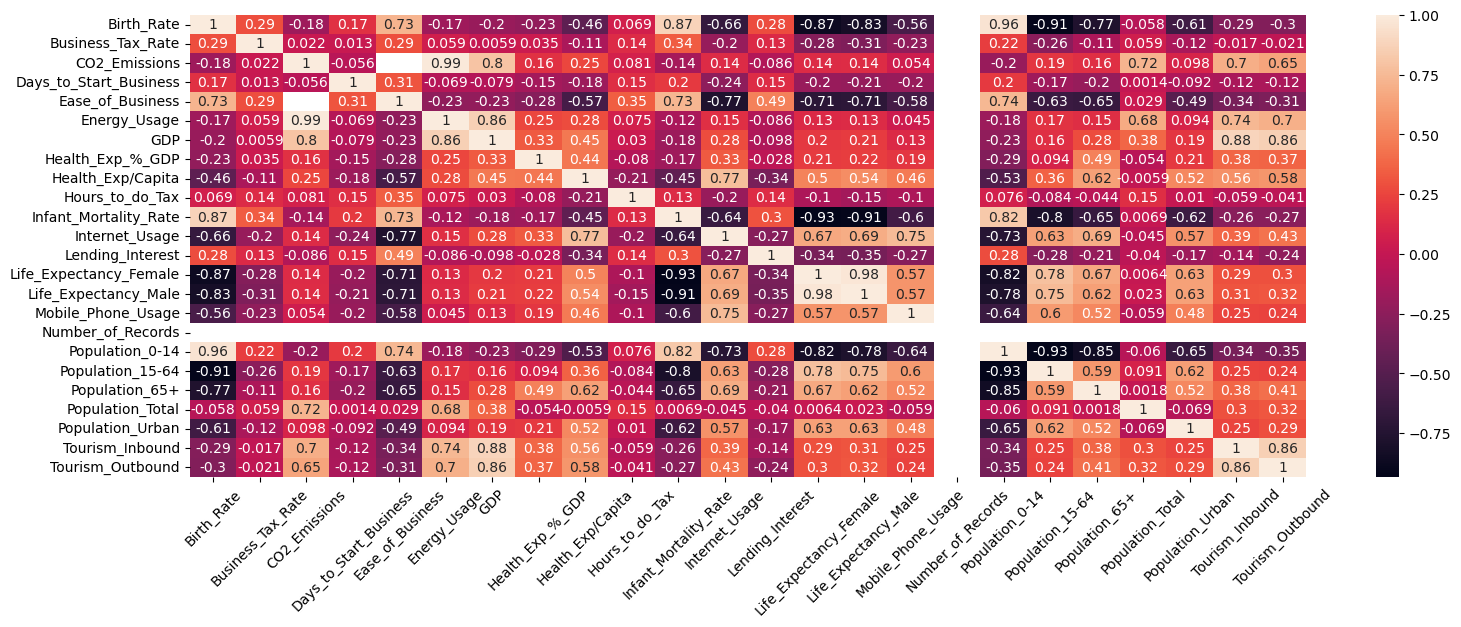

In [519]:
#Heatmap(test)
fig= plt.figure(figsize=(18, 6))
sns.heatmap(data.corr(), annot=True);
plt.xticks(rotation=45)

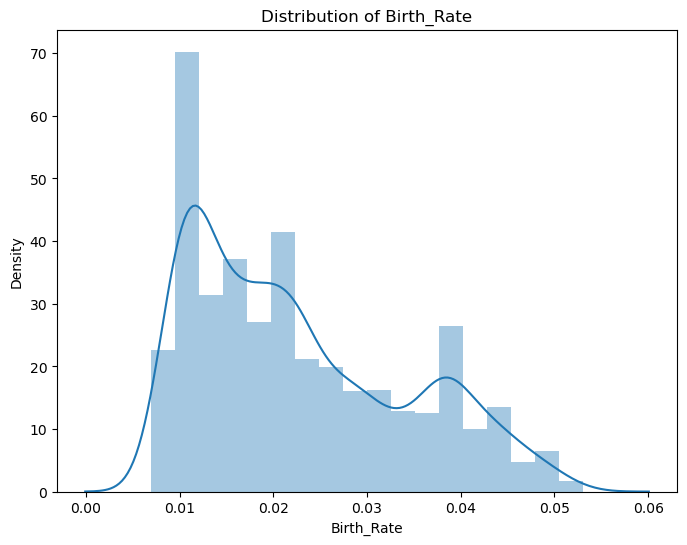

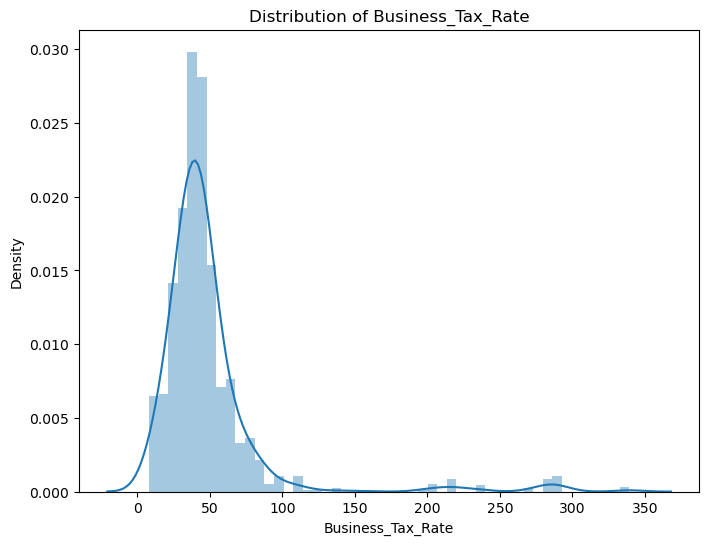

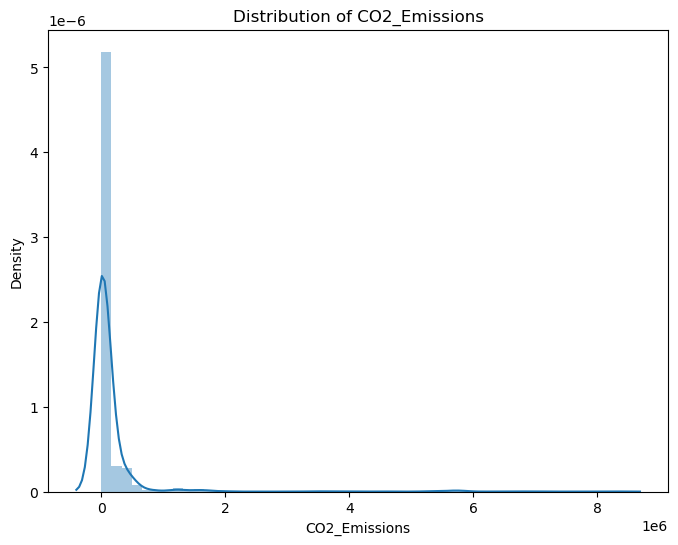

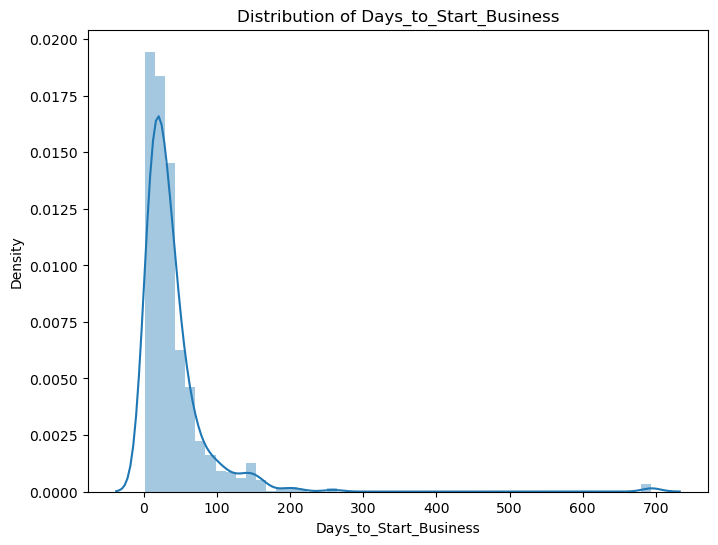

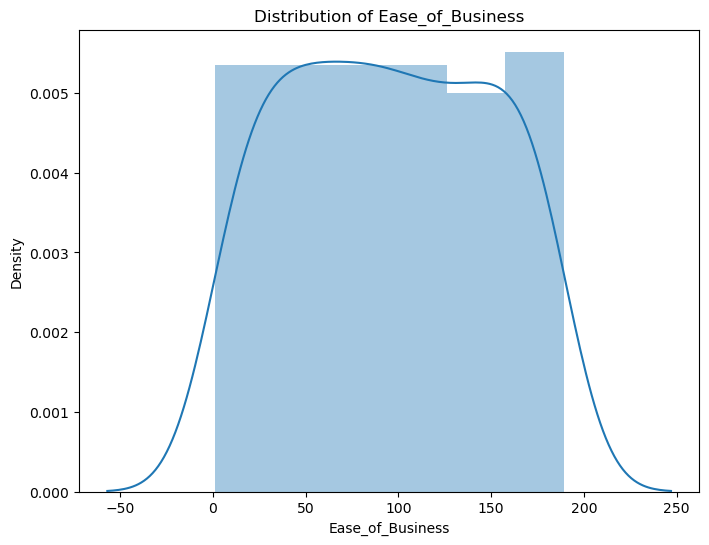

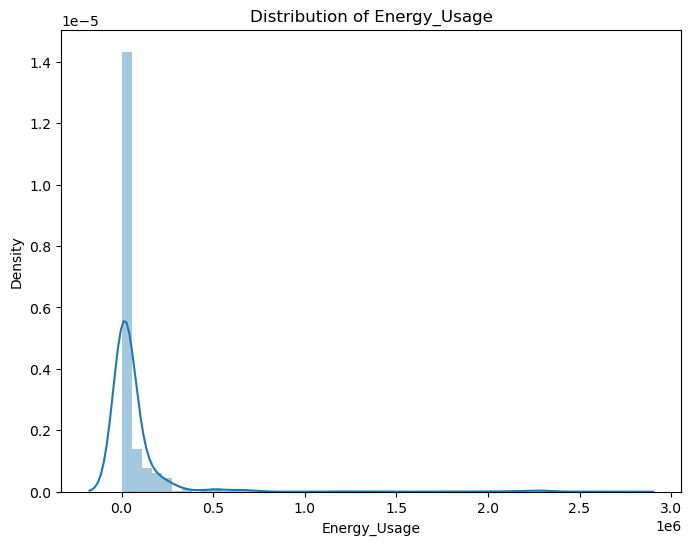

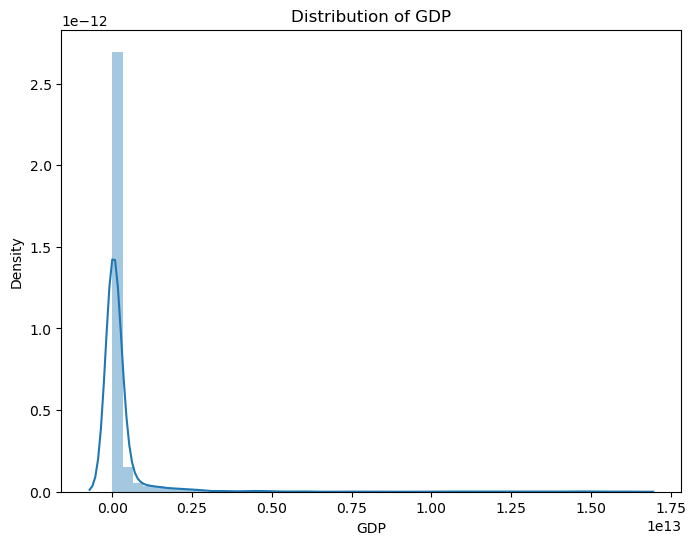

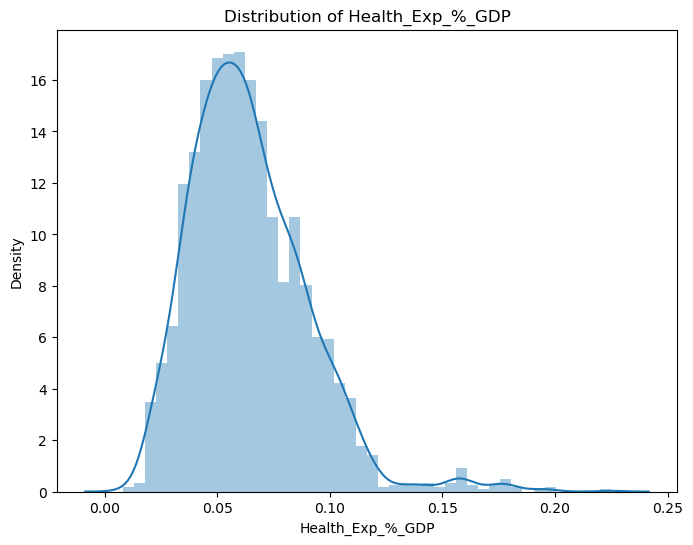

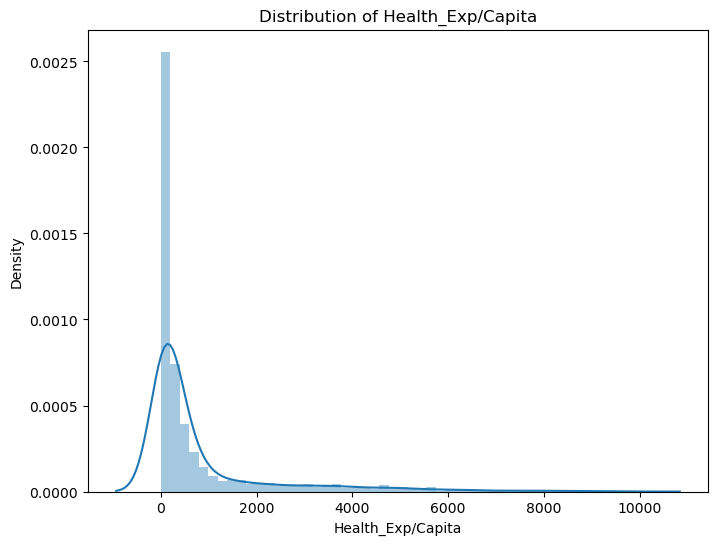

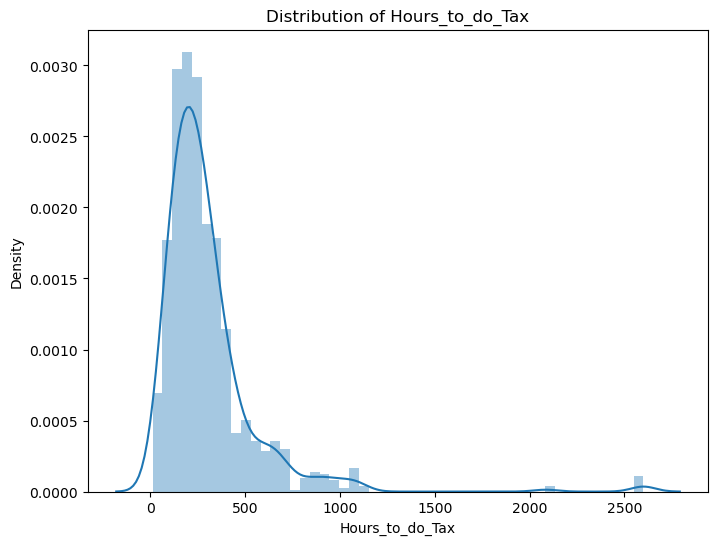

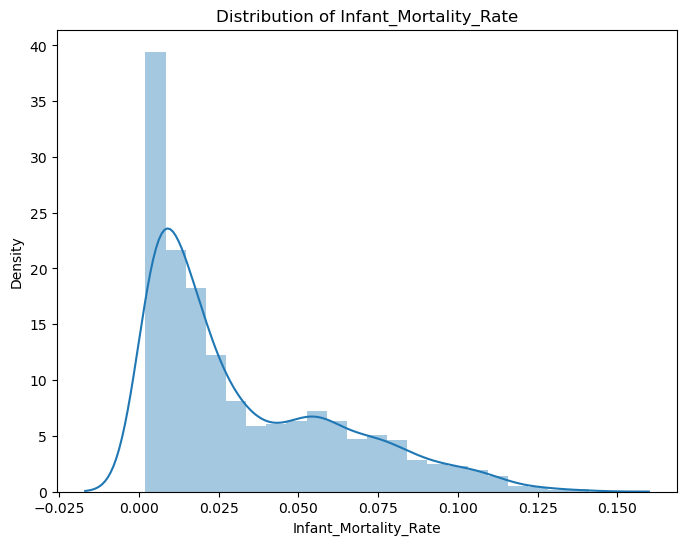

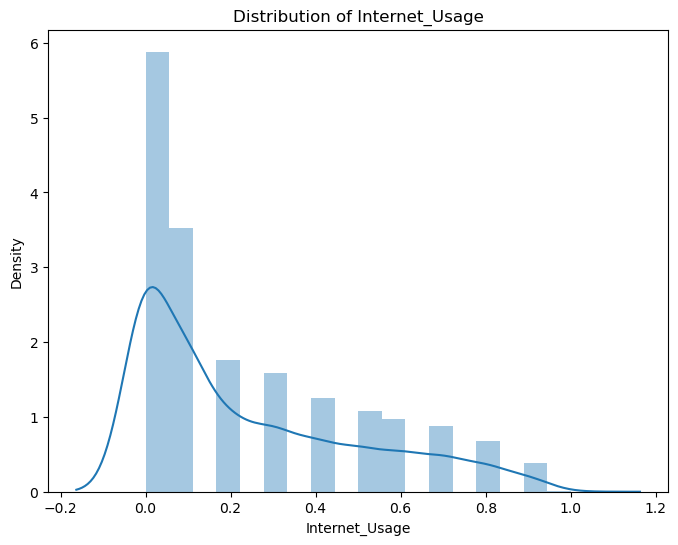

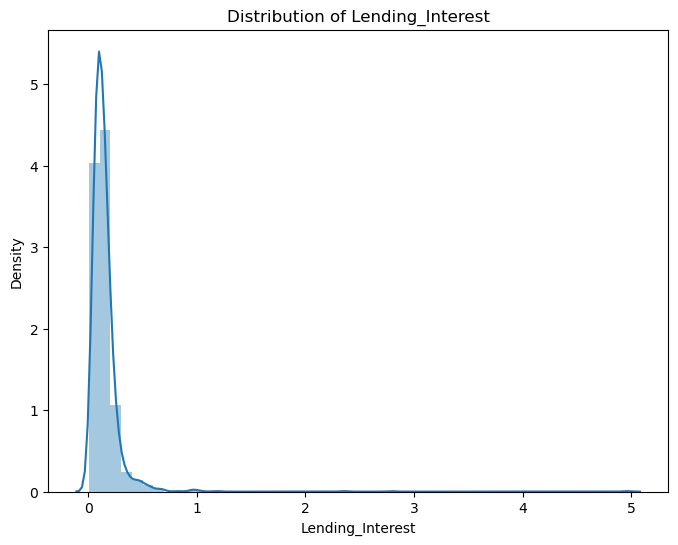

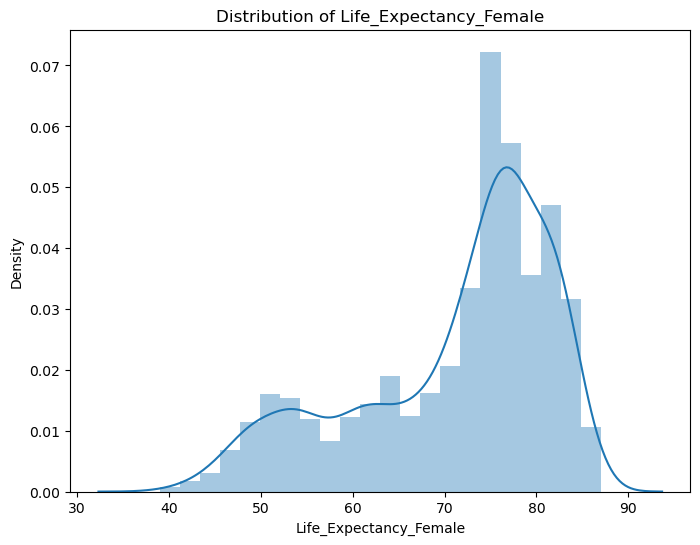

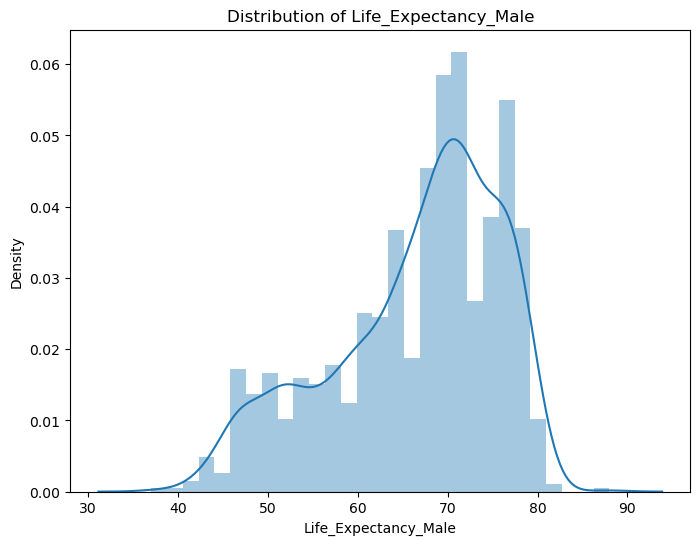

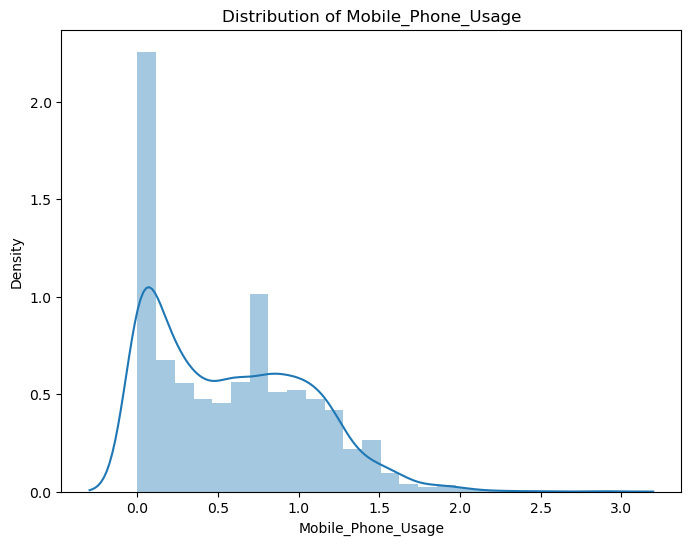

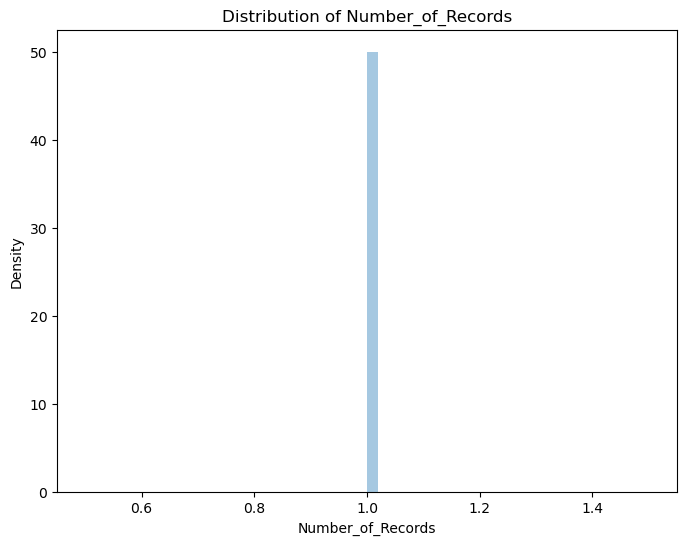

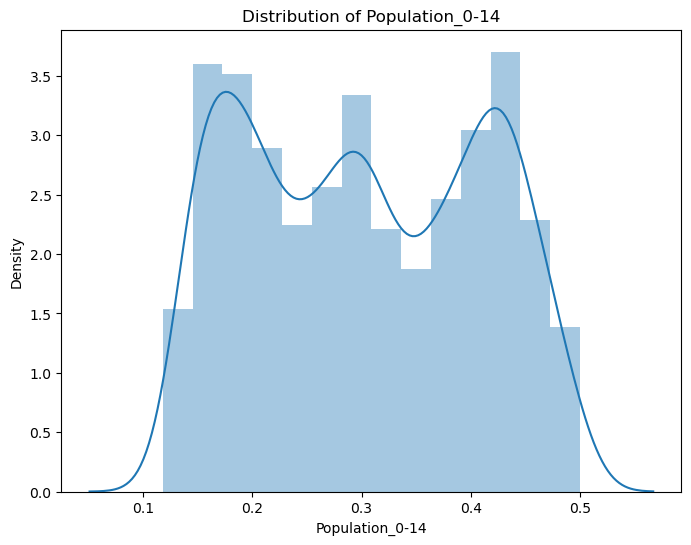

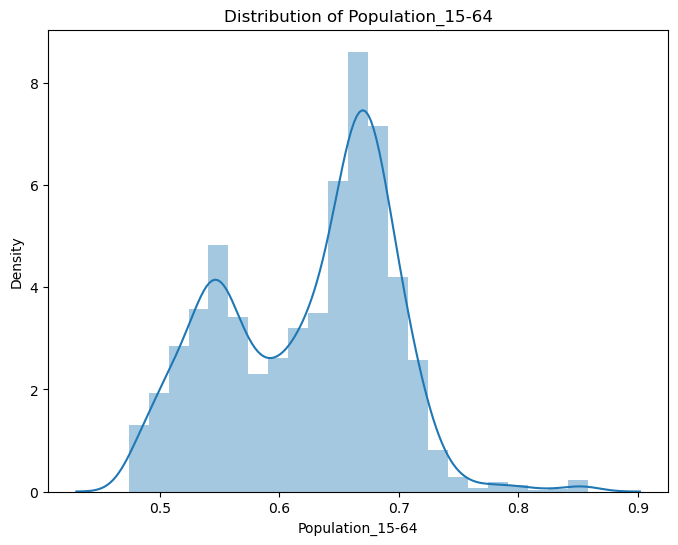

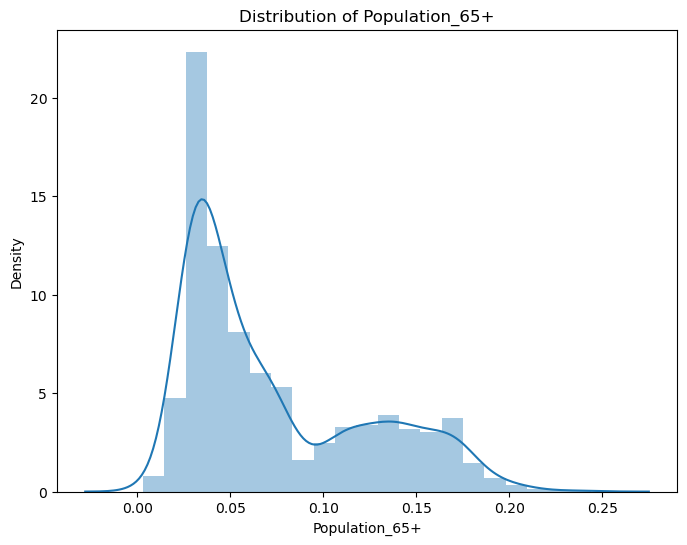

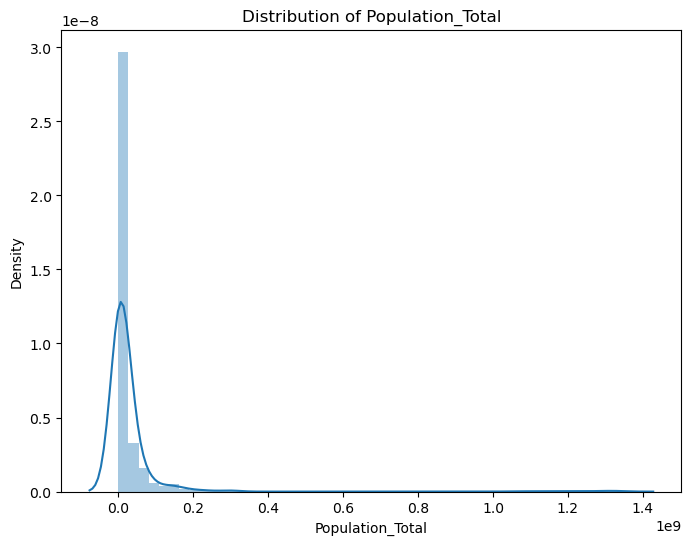

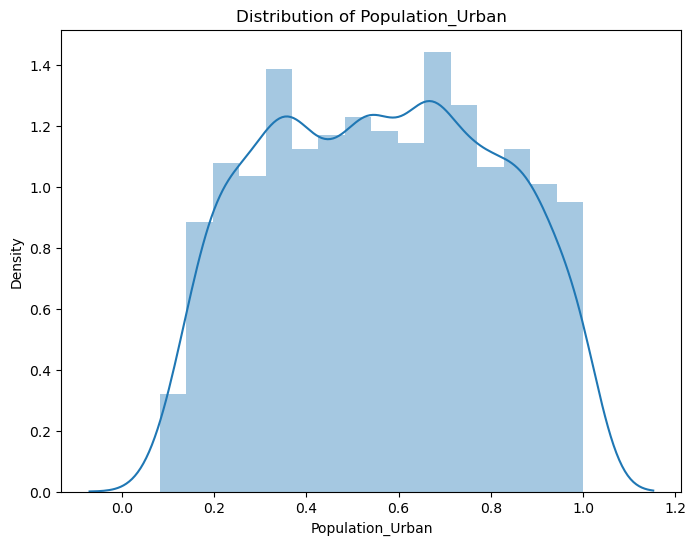

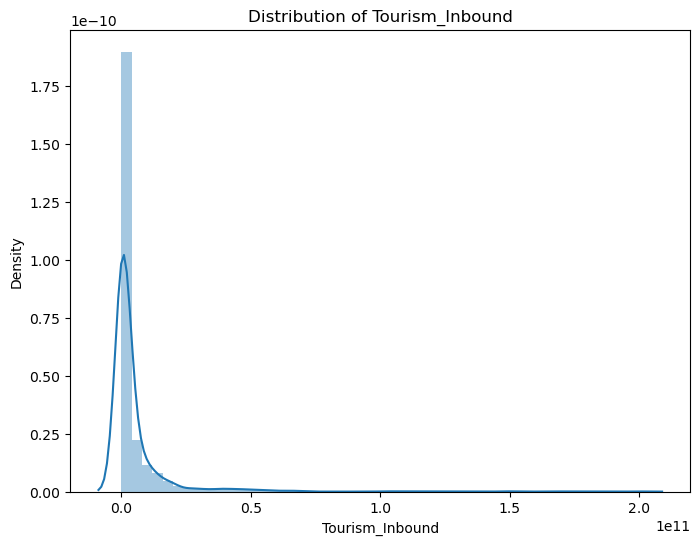

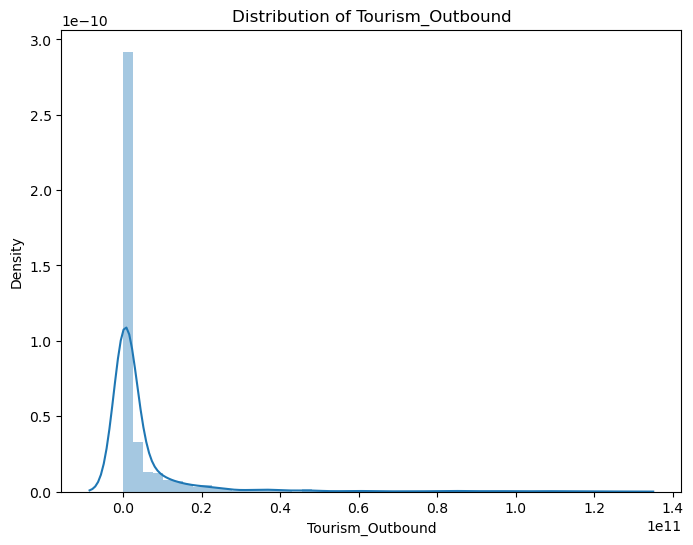

In [520]:
import matplotlib.pyplot as plt
import seaborn as sns

data1 = ['Birth_Rate', 'Business_Tax_Rate', 'CO2_Emissions',
         'Days_to_Start_Business', 'Ease_of_Business', 'Energy_Usage', 'GDP',
         'Health_Exp_%_GDP', 'Health_Exp/Capita', 'Hours_to_do_Tax',
         'Infant_Mortality_Rate', 'Internet_Usage', 'Lending_Interest',
         'Life_Expectancy_Female', 'Life_Expectancy_Male', 'Mobile_Phone_Usage',
         'Number_of_Records', 'Population_0-14', 'Population_15-64',
         'Population_65+', 'Population_Total', 'Population_Urban',
         'Tourism_Inbound', 'Tourism_Outbound']

for column in data1:
    plt.figure(figsize=(8, 6))
    sns.distplot(data[column])
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)  # Set xlabel as the column name
    plt.ylabel("Density")  # Set ylabel as "Density"
    plt.show()


In [521]:
import pandas as pd

# Assuming 'data' is your DataFrame
selected_columns = ['Birth_Rate', 'Business_Tax_Rate', 'CO2_Emissions',
                    'Days_to_Start_Business', 'Ease_of_Business', 'Energy_Usage', 'GDP',
                    'Health_Exp_%_GDP', 'Health_Exp/Capita', 'Hours_to_do_Tax',
                    'Infant_Mortality_Rate', 'Internet_Usage', 'Lending_Interest',
                    'Life_Expectancy_Female', 'Life_Expectancy_Male', 'Mobile_Phone_Usage',
                    'Number_of_Records', 'Population_0-14', 'Population_15-64',
                    'Population_65+', 'Population_Total', 'Population_Urban',
                    'Tourism_Inbound', 'Tourism_Outbound']

for column in selected_columns:
    kurtosis_value = data[column].kurtosis()
    if kurtosis_value == 3:
        kurtosis_type = "\033[94mMesokurtic\033[0m"  # Blue color
    elif kurtosis_value > 3:
        kurtosis_type = "\033[92mLeptokurtic\033[0m"  # Green color
    else:
        kurtosis_type = "\033[91mPlatykurtic\033[0m"  # Red color
    print(f"Kurtosis of {column}: {kurtosis_value}, Kurtosis Type: {kurtosis_type}")


Kurtosis of Birth_Rate: -0.683573092601768, Kurtosis Type: Platykurtic
Kurtosis of Business_Tax_Rate: 21.82660156057662, Kurtosis Type: Leptokurtic
Kurtosis of CO2_Emissions: 83.08072061737991, Kurtosis Type: Leptokurtic
Kurtosis of Days_to_Start_Business: 77.66193036605749, Kurtosis Type: Leptokurtic
Kurtosis of Ease_of_Business: -1.2005527565572862, Kurtosis Type: Platykurtic
Kurtosis of Energy_Usage: 54.89056894965293, Kurtosis Type: Leptokurtic
Kurtosis of GDP: 105.53278543163829, Kurtosis Type: Leptokurtic
Kurtosis of Health_Exp_%_GDP: 2.9632324659393756, Kurtosis Type: Platykurtic
Kurtosis of Health_Exp/Capita: 8.399443424915667, Kurtosis Type: Leptokurtic
Kurtosis of Hours_to_do_Tax: 30.79232334645546, Kurtosis Type: Leptokurtic
Kurtosis of Infant_Mortality_Rate: 0.17224076104202402, Kurtosis Type: Platykurtic
Kurtosis of Internet_Usage: -0.2723868837460097, Kurtosis Type: Platykurtic
Kurtosis of Lending_Interest: 374.12253857605845, Kurtosis Type: Leptokurtic
Kurtosis of Life_E

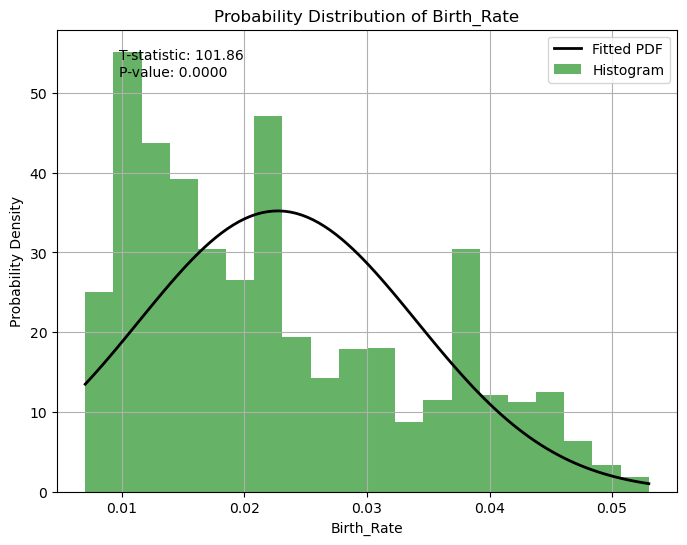

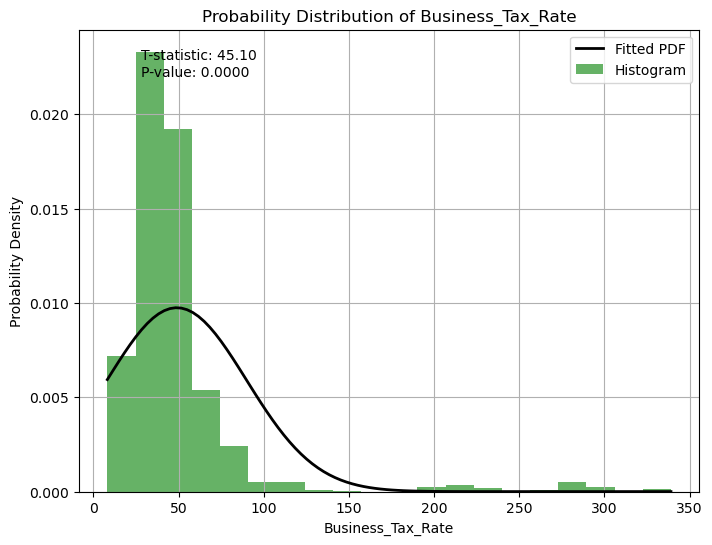

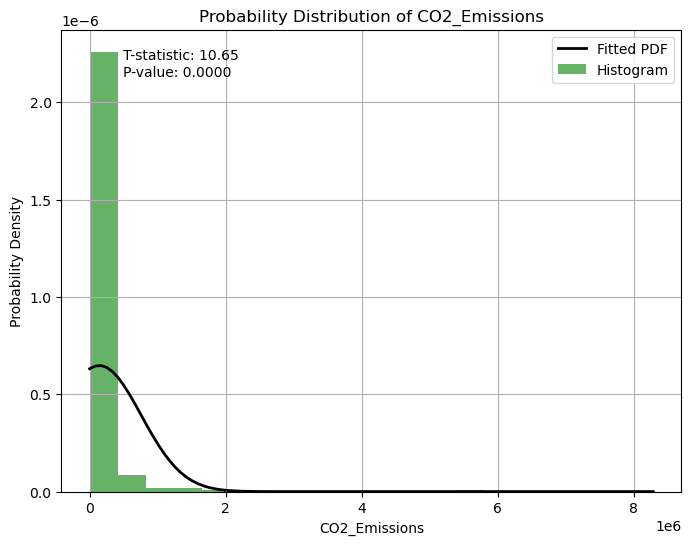

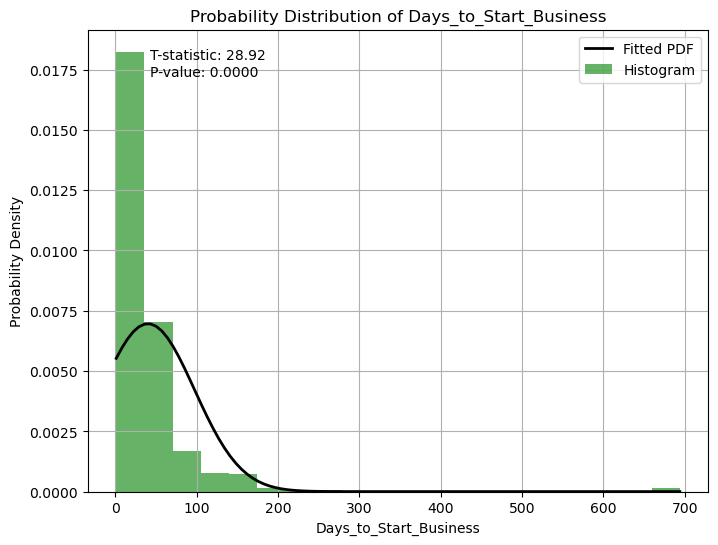

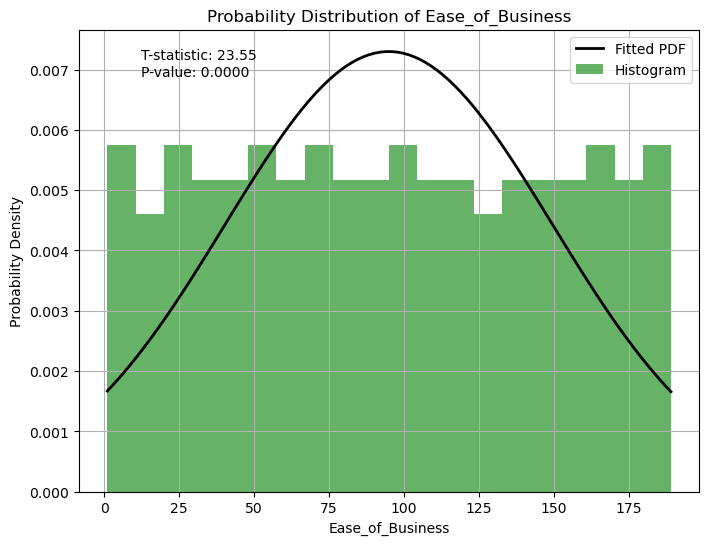

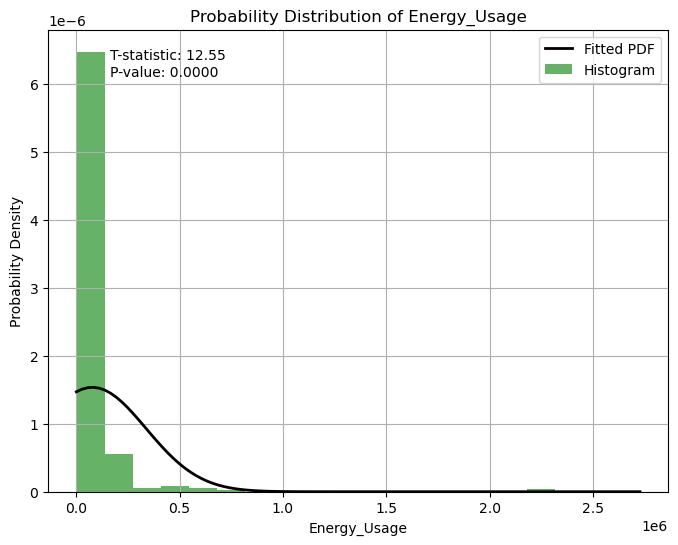

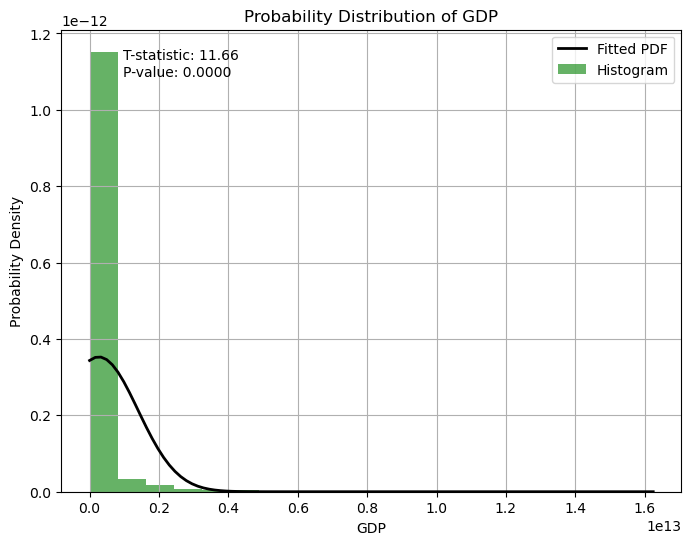

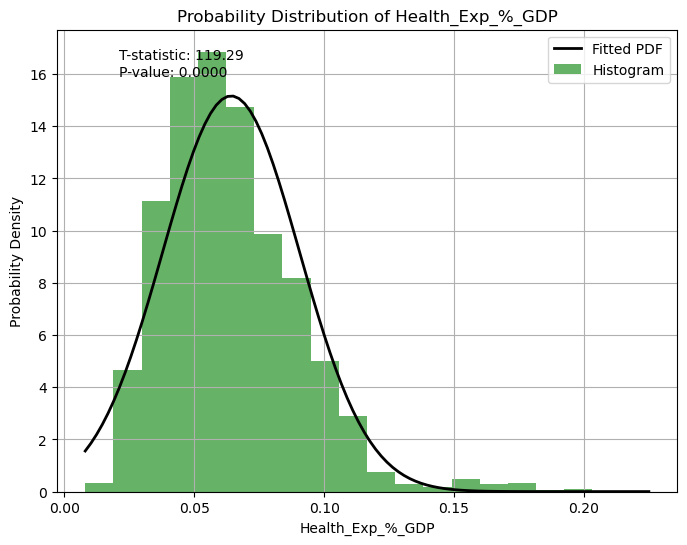

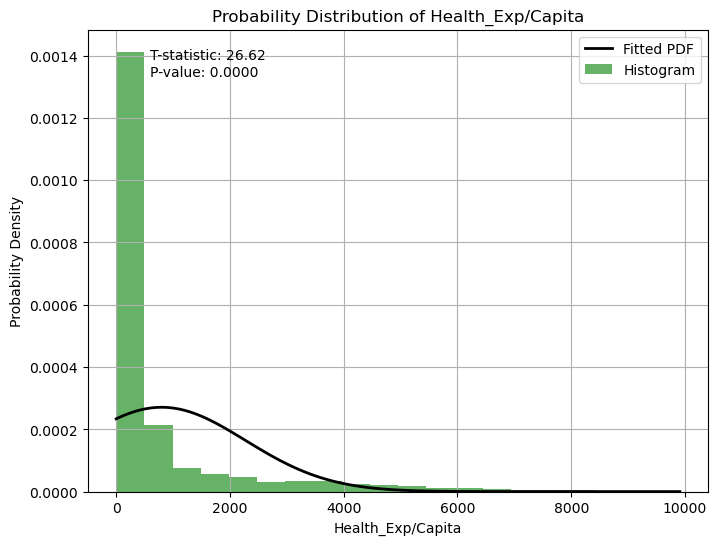

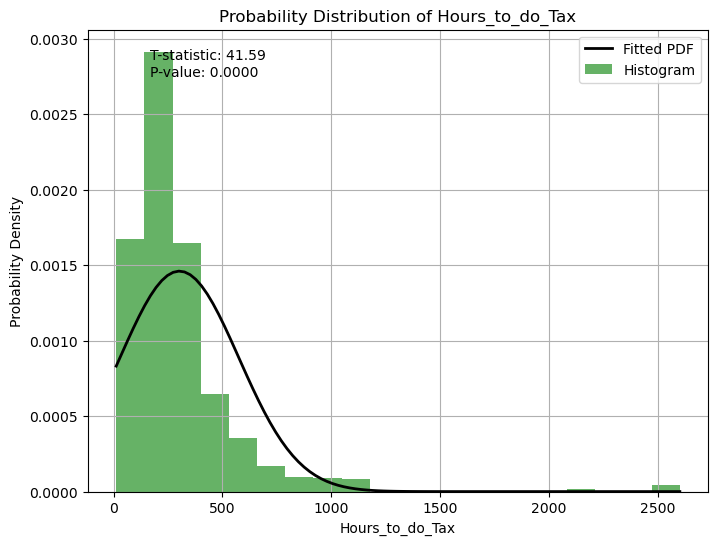

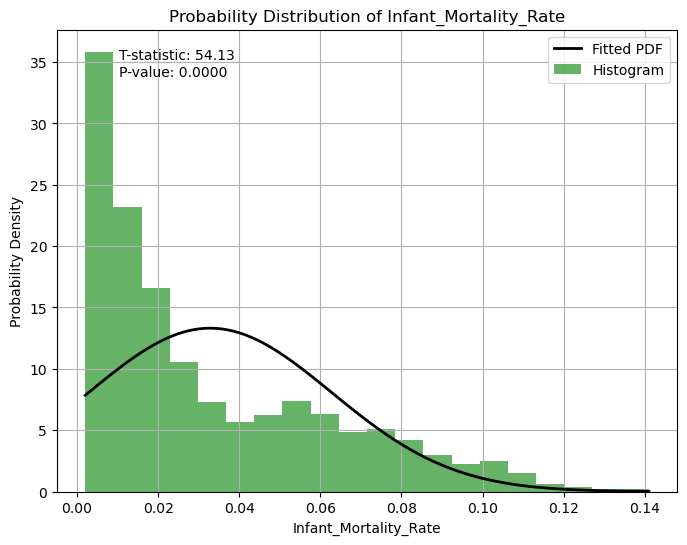

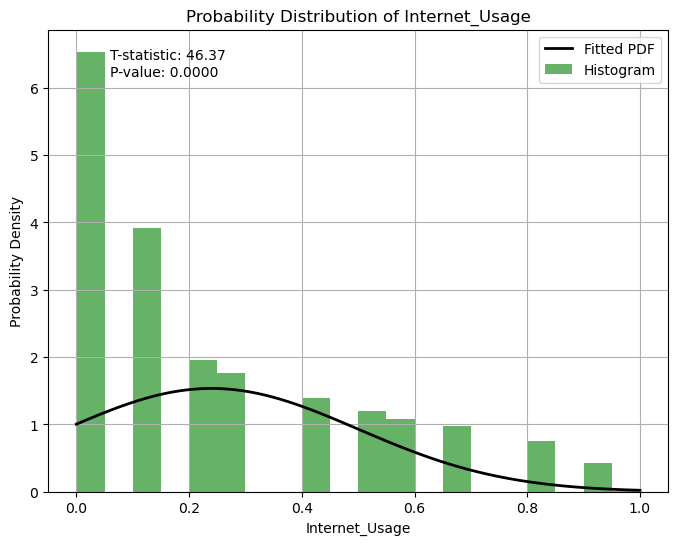

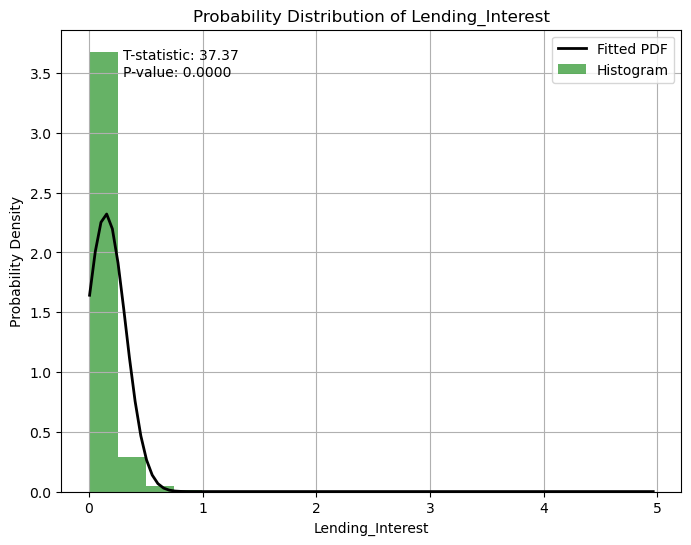

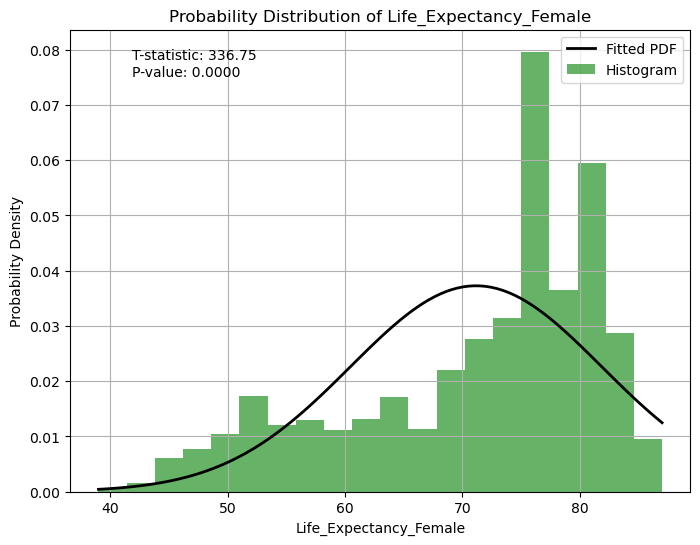

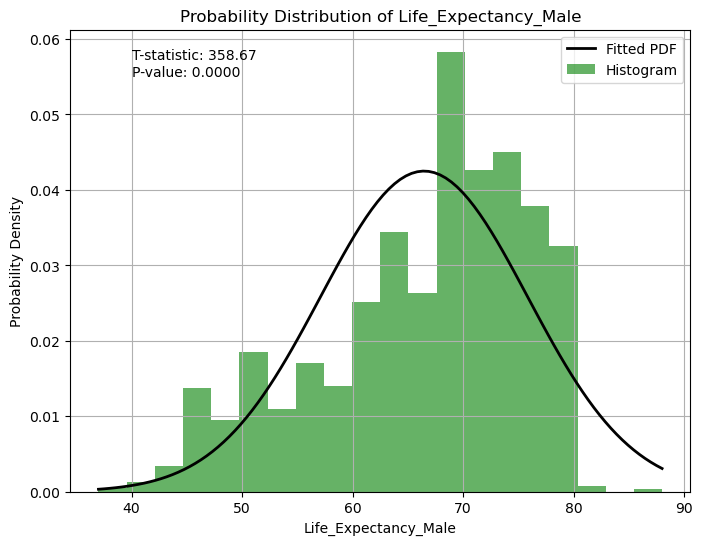

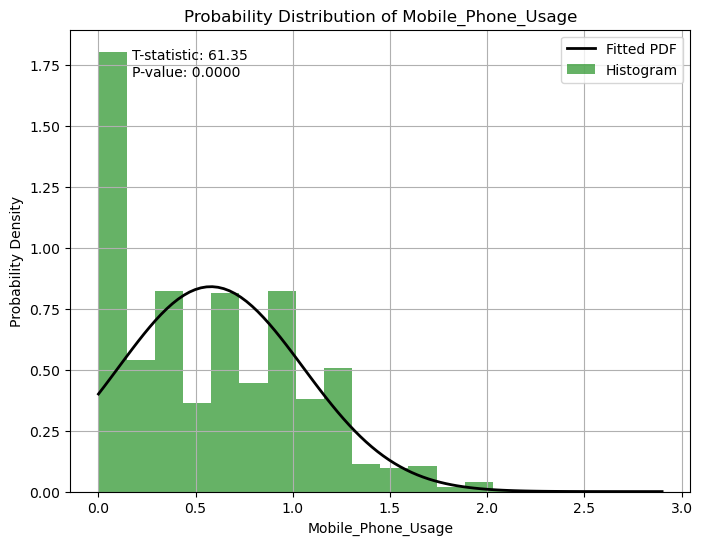

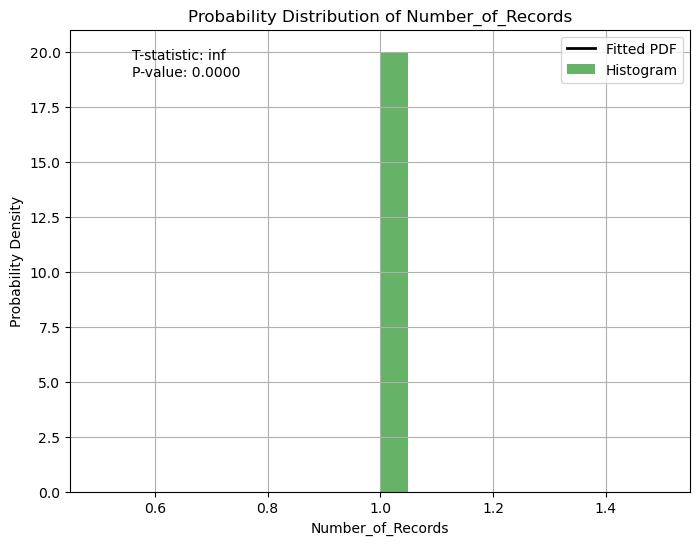

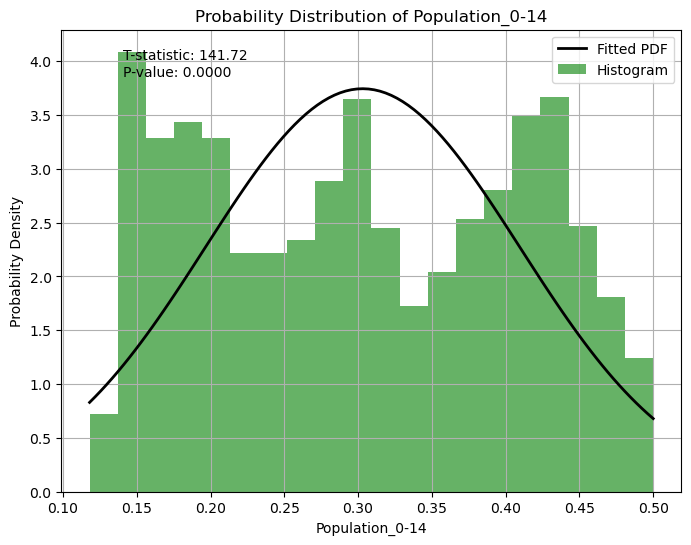

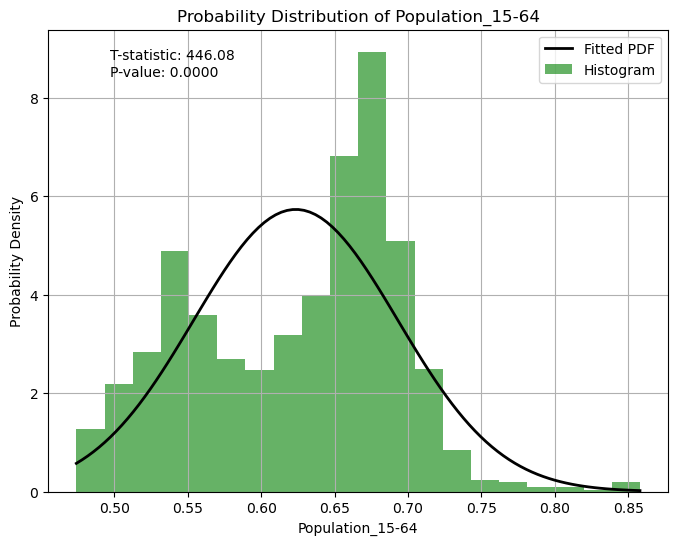

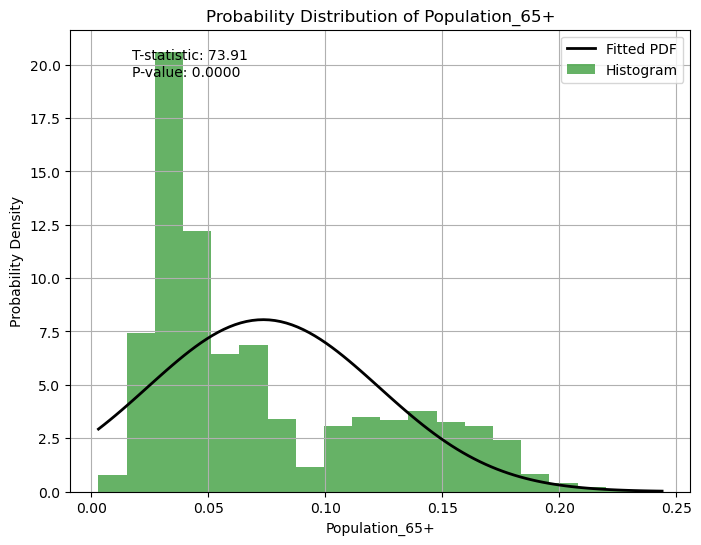

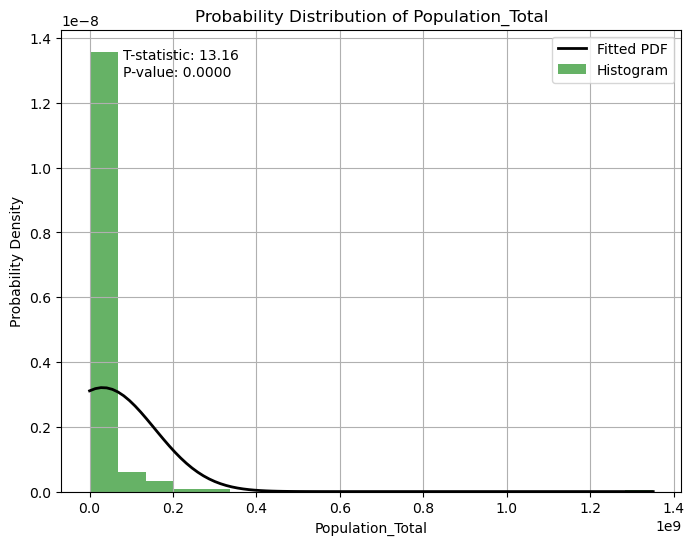

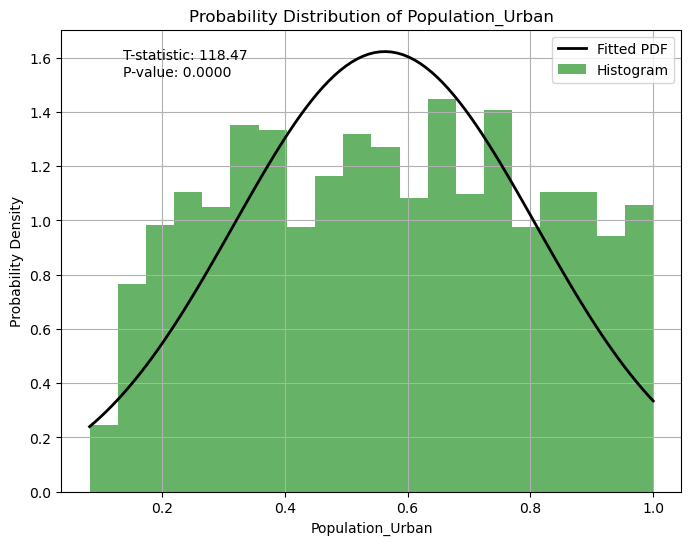

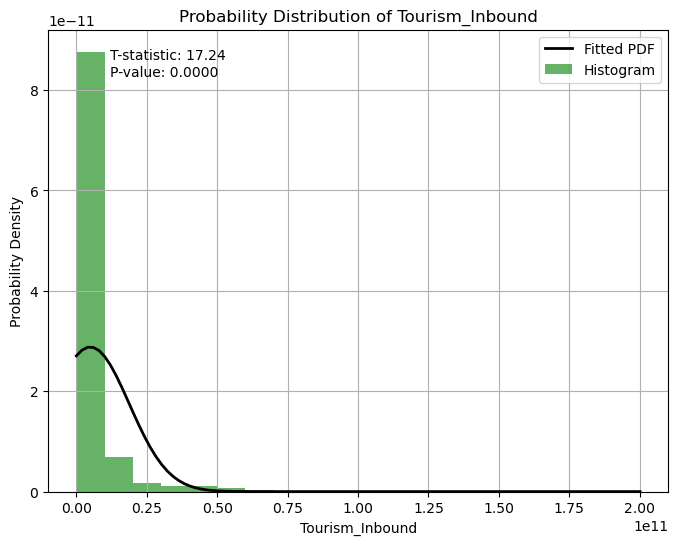

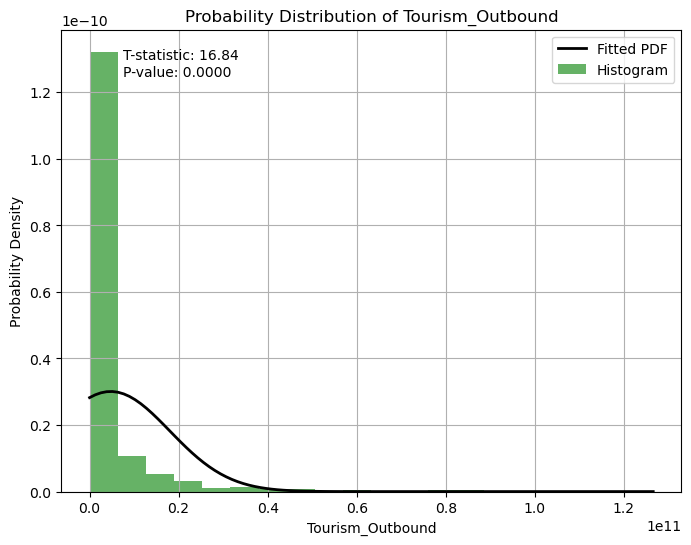

In [522]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

data1 = ['Birth_Rate', 'Business_Tax_Rate', 'CO2_Emissions',
         'Days_to_Start_Business', 'Ease_of_Business', 'Energy_Usage', 'GDP',
         'Health_Exp_%_GDP', 'Health_Exp/Capita', 'Hours_to_do_Tax',
         'Infant_Mortality_Rate', 'Internet_Usage', 'Lending_Interest',
         'Life_Expectancy_Female', 'Life_Expectancy_Male', 'Mobile_Phone_Usage',
         'Number_of_Records', 'Population_0-14', 'Population_15-64',
         'Population_65+', 'Population_Total', 'Population_Urban',
         'Tourism_Inbound', 'Tourism_Outbound']

# Define the population mean for comparison
population_mean = 0  # Change this to the desired population mean

for column in data1:
    plt.figure(figsize=(8, 6))
    # Perform the t-test
    t_statistic, p_value = stats.ttest_1samp(data[column].dropna(), population_mean)
    
    # Fit a probability distribution to the data
    dist = getattr(stats, 'norm')  # You can choose a different distribution if desired
    params = dist.fit(data[column].dropna())  # Fit the distribution to the data
    # Generate random numbers from the fitted distribution
    rv = dist(*params)
    x = np.linspace(data[column].min(), data[column].max(), 100)
    plt.plot(x, rv.pdf(x), 'k-', lw=2, label='Fitted PDF')
    
    # Plot histogram of the data
    plt.hist(data[column].dropna(), bins=20, density=True, alpha=0.6, color='g', label='Histogram')
    
    # Display t-test results
    plt.text(0.1, 0.9, f"T-statistic: {t_statistic:.2f}\nP-value: {p_value:.4f}", transform=plt.gca().transAxes)
    
    plt.title(f"Probability Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Probability Density")
    plt.legend()
    plt.grid(True)
    plt.show()


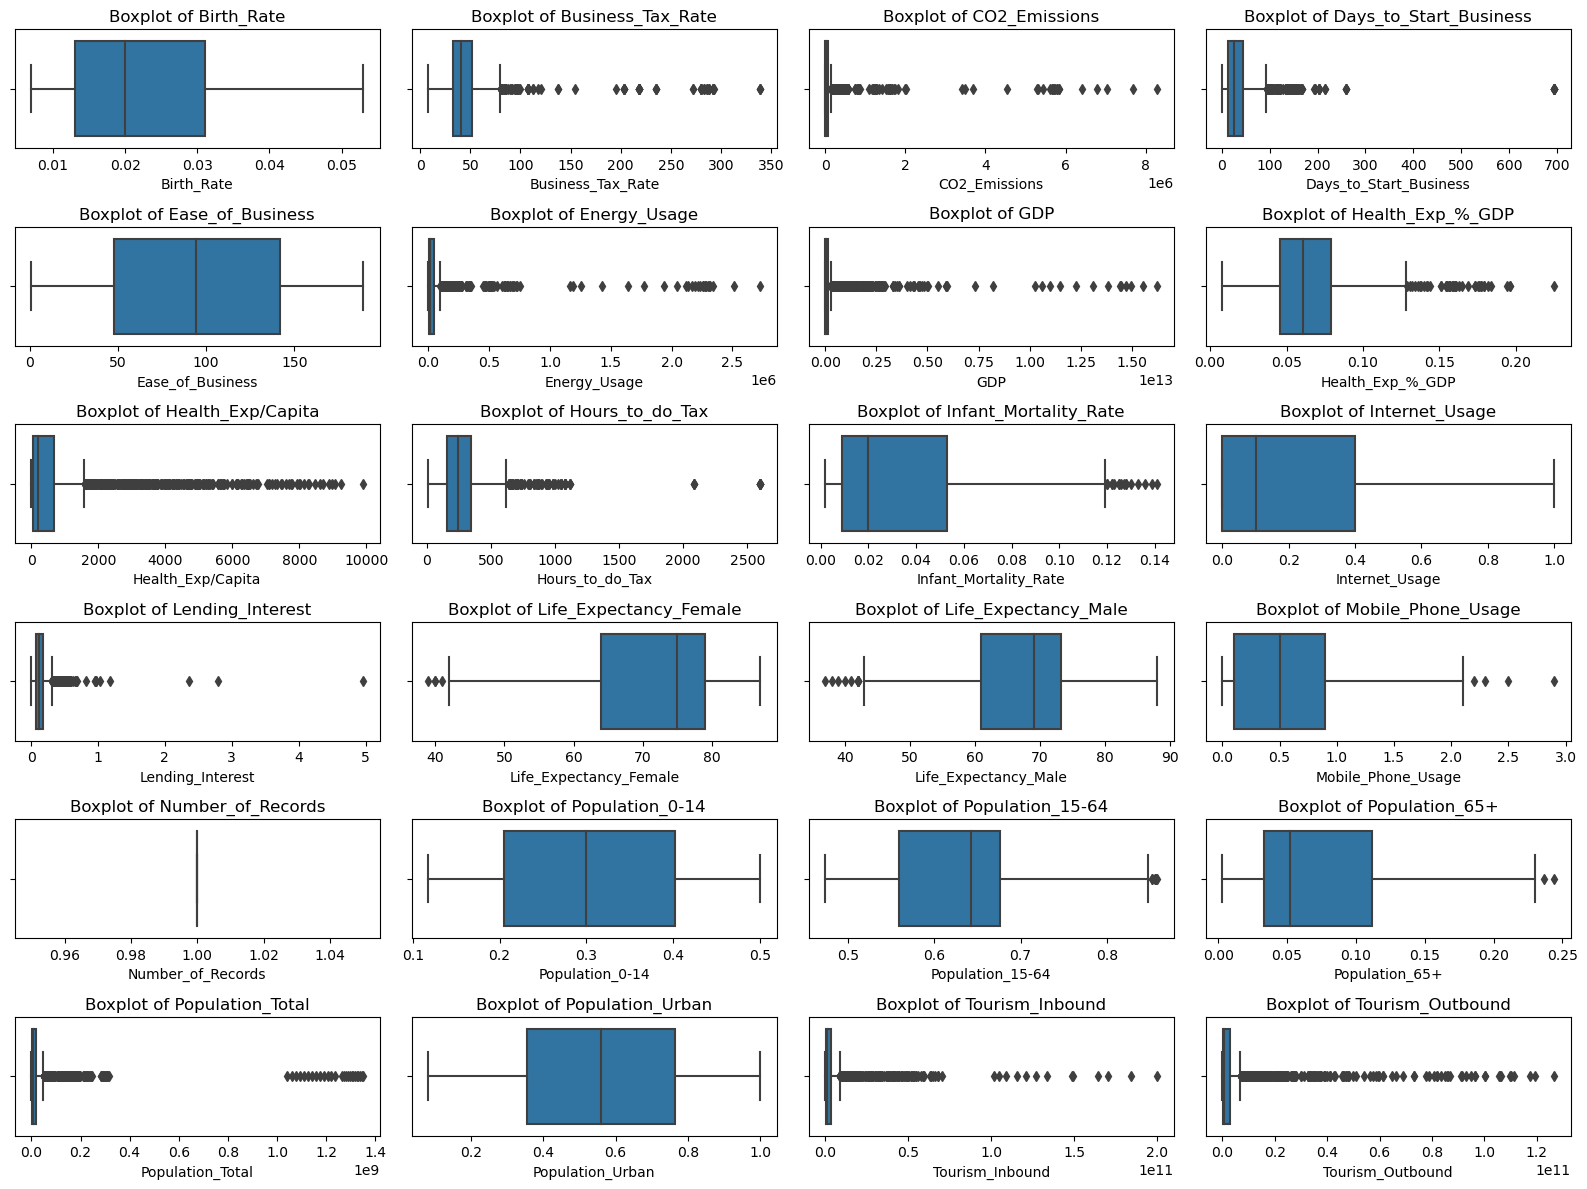

In [523]:
import seaborn as sns
import matplotlib.pyplot as plt

data1 = ['Birth_Rate', 'Business_Tax_Rate', 'CO2_Emissions',
         'Days_to_Start_Business', 'Ease_of_Business', 'Energy_Usage', 'GDP',
         'Health_Exp_%_GDP', 'Health_Exp/Capita', 'Hours_to_do_Tax',
         'Infant_Mortality_Rate', 'Internet_Usage', 'Lending_Interest',
         'Life_Expectancy_Female', 'Life_Expectancy_Male', 'Mobile_Phone_Usage',
         'Number_of_Records', 'Population_0-14', 'Population_15-64',
         'Population_65+', 'Population_Total', 'Population_Urban',
         'Tourism_Inbound', 'Tourism_Outbound']

# Calculate grid dimensions
num_cols = 4
num_rows = (len(data1) + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 12))

# Flatten axes in case num_rows > 1
axes = axes.flatten()

# Plot each feature
for i, column in enumerate(data1):
    sns.boxplot(x=data[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_xlabel(column)

# Remove any empty subplots
for i in range(len(data1), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [524]:
import pandas as pd
from pivottablejs import pivot_ui

pivot_ui(data)


In [525]:
# Replace missing values by mean for selected columns
mean_fill_cols = ['Business_Tax_Rate', 'Ease_of_Business', 'Health_Exp_%_GDP', 'Hours_to_do_Tax', 'Population_0-14']

data[mean_fill_cols] = data[mean_fill_cols].fillna(data[mean_fill_cols].mean())

# Replace missing values by median for other columns
median_fill_cols = ['Birth_Rate', 'CO2_Emissions', 'Days_to_Start_Business', 'Energy_Usage', 'Health_Exp/Capita',
                    'GDP', 'Infant_Mortality_Rate', 'Internet_Usage', 'Lending_Interest', 'Life_Expectancy_Female',
                    'Life_Expectancy_Male', 'Mobile_Phone_Usage', 'Tourism_Inbound', 'Tourism_Outbound',
                    'Population_15-64', 'Population_65+', 'Population_Total', 'Population_Urban']

data[median_fill_cols] = data[median_fill_cols].fillna(data[median_fill_cols].median())


In [526]:
data

Birth_Rate  Business_Tax_Rate  CO2_Emissions                   Country  \
0          0.020          48.966901        87931.0                   Algeria   
1          0.050          48.966901         9542.0                    Angola   
2          0.043          48.966901         1617.0                     Benin   
3          0.027          48.966901         4276.0                  Botswana   
4          0.046          48.966901         1041.0              Burkina Faso   
...          ...                ...            ...                       ...   
2699       0.020          48.966901         8529.0  Turks and Caicos Islands   
2700       0.013          46.400000         8529.0             United States   
2701       0.015          41.900000         8529.0                   Uruguay   
2702       0.020          61.900000         8529.0             Venezuela, RB   
2703       0.011          48.966901         8529.0     Virgin Islands (U.S.)   

      Days_to_Start_Business  Ease_of_Business  Energy_Usage           GDP  \
0                       26.0         94.875676       26998.0  5.479006e+10   
1                       26.0         94.875676        7499.0  9.129595e+09   
2                       26.0         94.875676        1983.0  2.359122e+09   
3                       26.0         94.875676        1836.0  5.788312e+09   
4                       26.0         94.875676       14338.0  2.610959e+09   
...                      ...               ...           ...           ...   
2699                    26.0         94.875676       14338.0  1.507975e+10   
2700                     5.0          4.000000     2132446.0  1.624460e+13   
2701                     7.0         85.000000       14338.0  5.000435e+10   
2702                   144.0        180.000000       14338.0  3.812862e+11   
2703                    26.0         94.875676       14338.0  1.507975e+10   

      Health_Exp_%_GDP  Health_Exp/Capita  ...  Life_Expectancy_Male  \
0              0.03500               60.0  ...                  67.0   
1              0.03400               22.0  ...                  44.0   
2              0.04300               15.0  ...                  53.0   
3              0.04700              152.0  ...                  49.0   
4              0.05100               12.0  ...                  49.0   
...                ...                ...  ...                   ...   
2699           0.06417              193.0  ...                  69.0   
2700           0.17900             8895.0  ...                  76.0   
2701           0.08900             1308.0  ...                  74.0   
2702           0.04600              593.0  ...                  72.0   
2703           0.06417              193.0  ...                  76.0   

      Mobile_Phone_Usage  Number_of_Records  Population_0-14  \
0                    0.0                  1         0.342000   
1                    0.0                  1         0.476000   
2                    0.0                  1         0.454000   
3                    0.1                  1         0.383000   
4                    0.0                  1         0.468000   
...                  ...                ...              ...   
2699                 0.5                  1         0.303051   
2700                 1.0                  1         0.196000   
2701                 1.5                  1         0.220000   
2702                 1.0                  1         0.288000   
2703                 0.5                  1         0.206000   

      Population_15-64  Population_65+  Population_Total  Population_Urban  \
0               0.6190           0.039          31719449             0.599   
1               0.4990           0.025          13924930             0.324   
2               0.5170           0.029           6949366             0.383   
3               0.5870           0.029           1755375             0.532   
4               0.5050           0.028          11607944             0.178   
...   

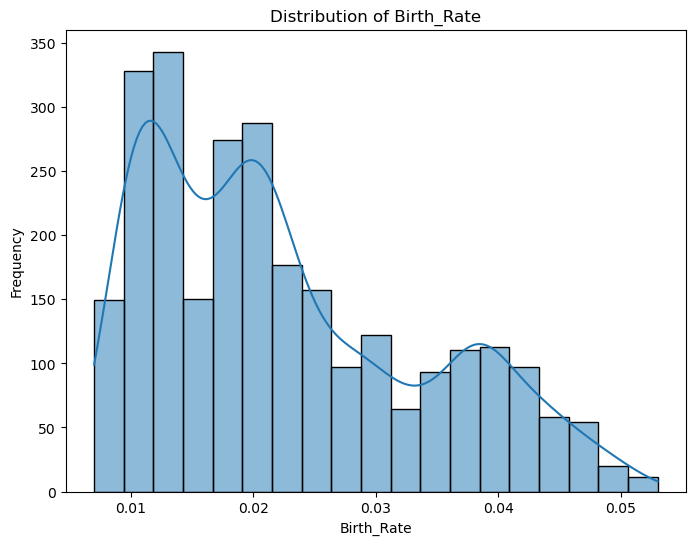

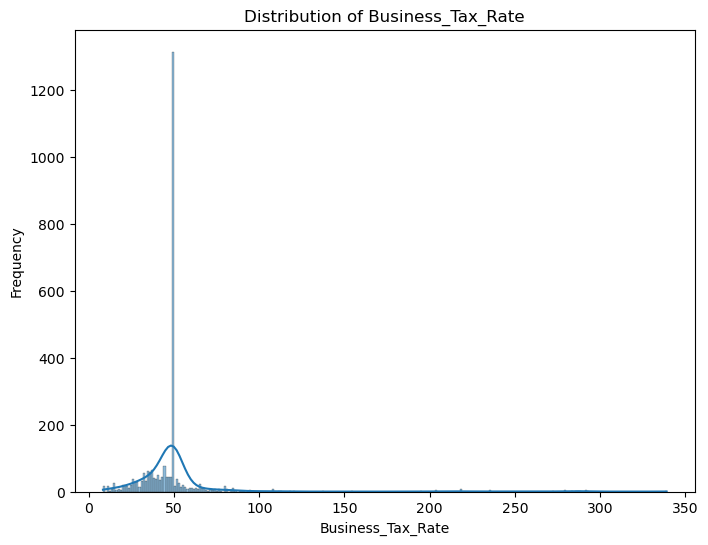

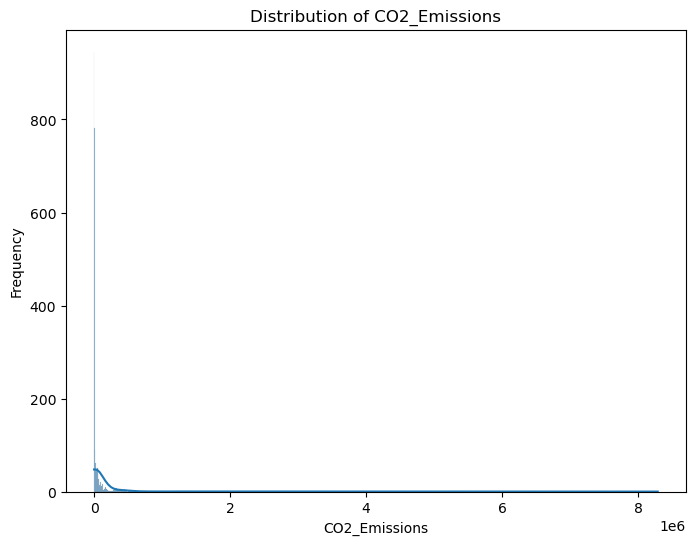

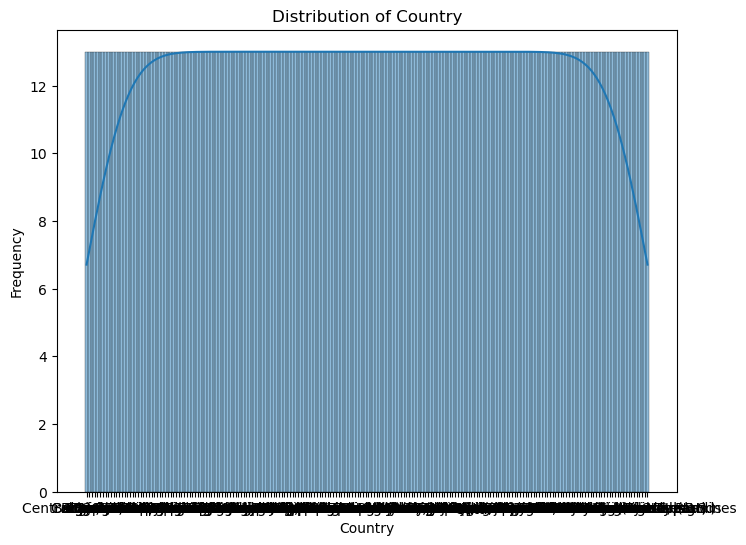

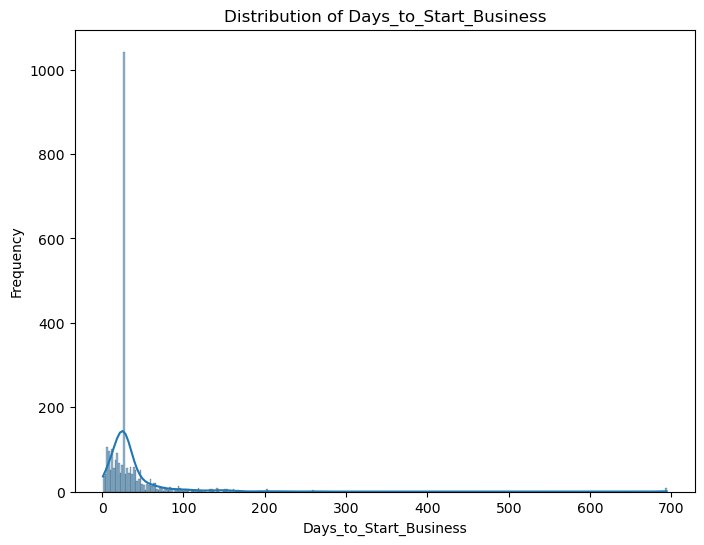

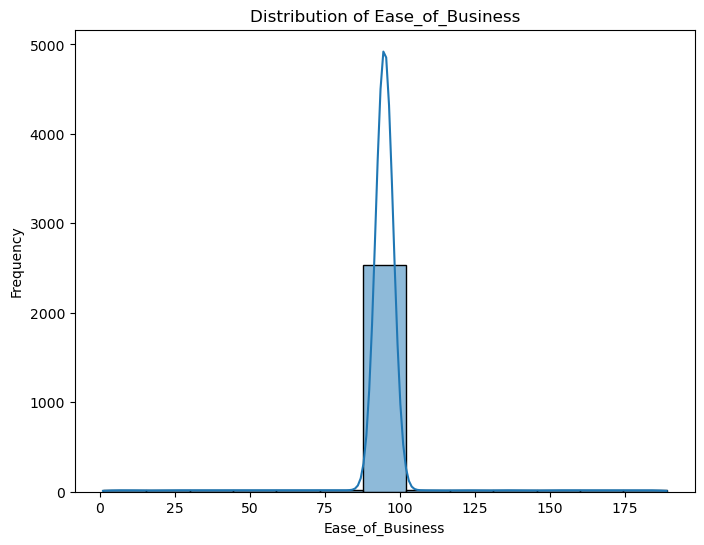

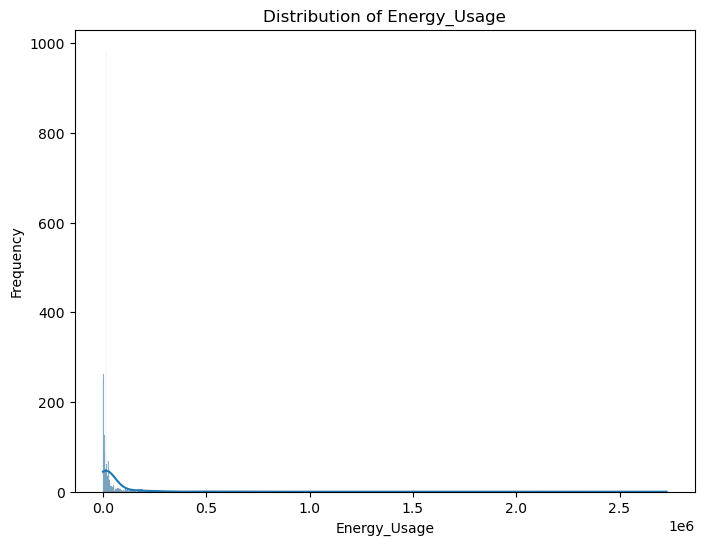

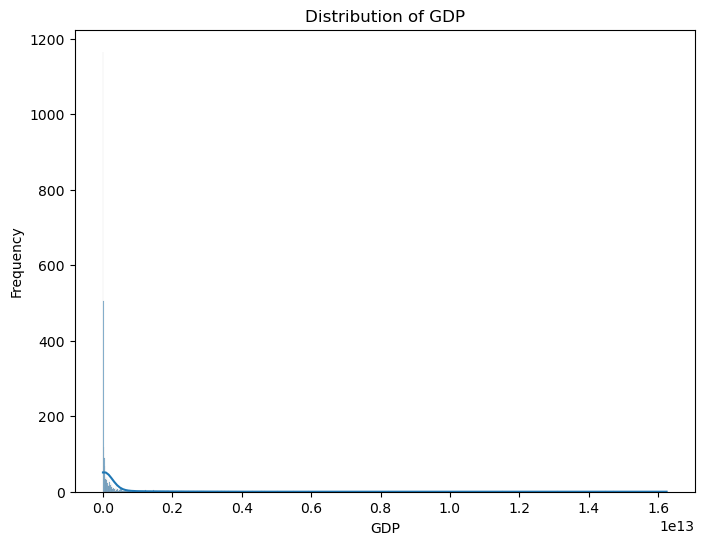

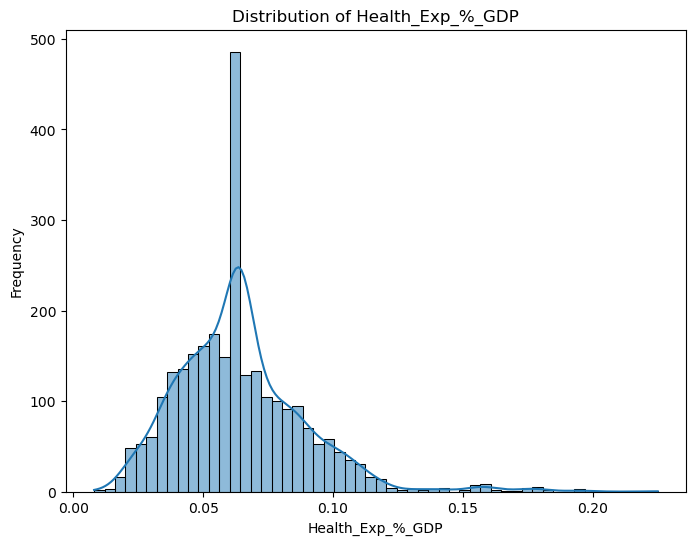

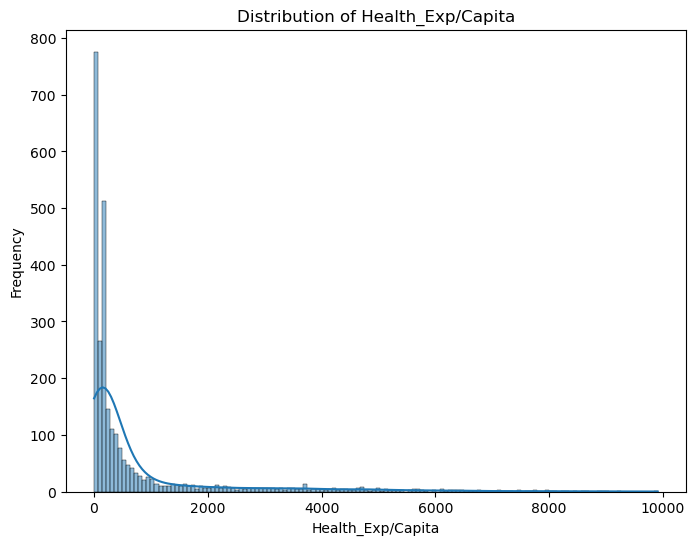

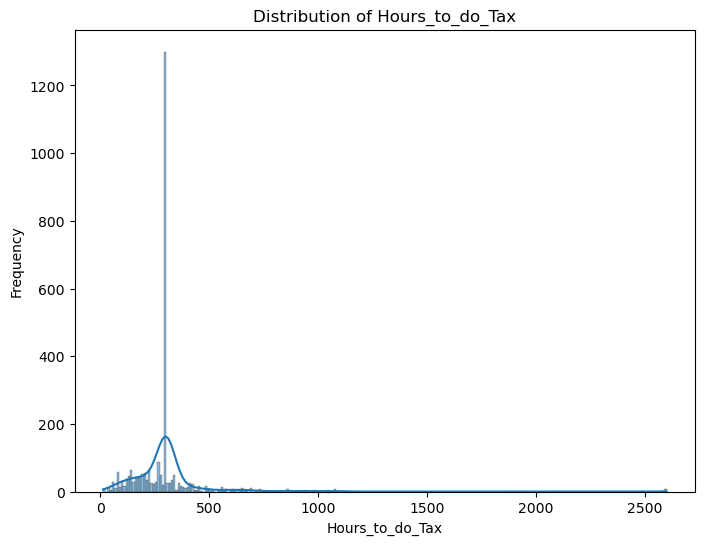

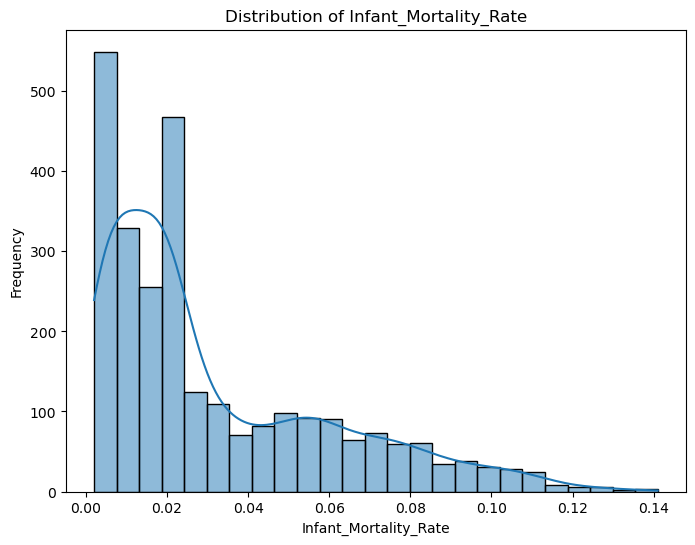

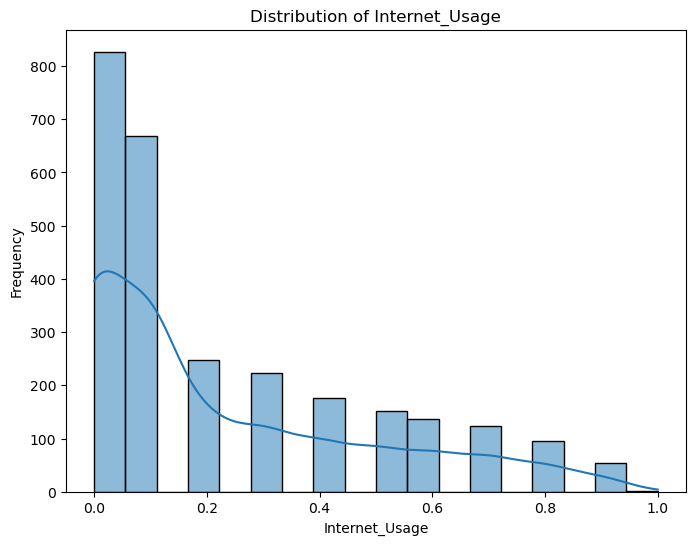

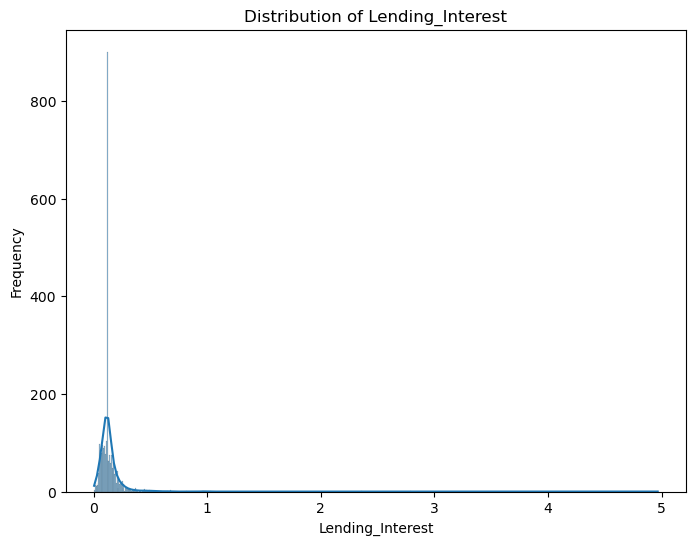

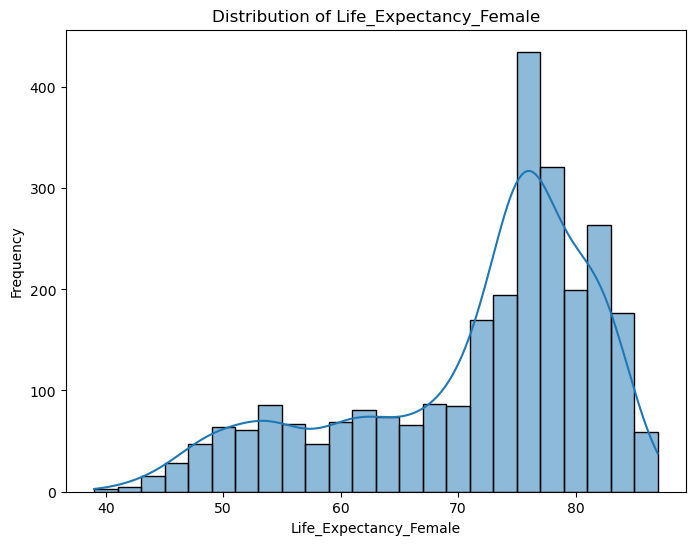

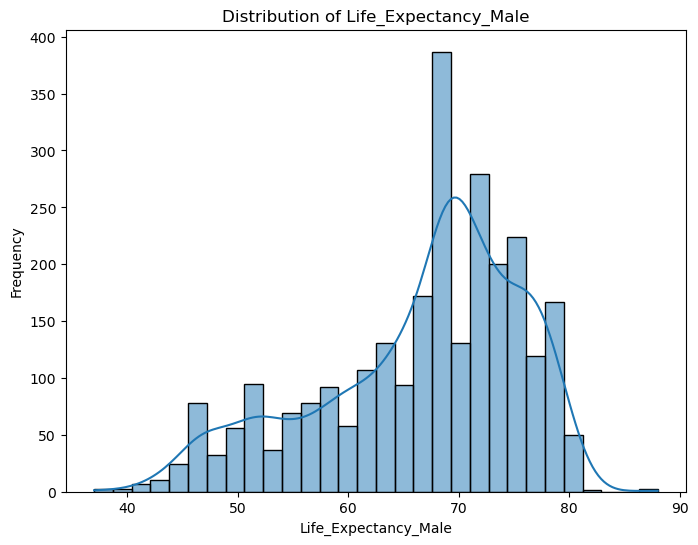

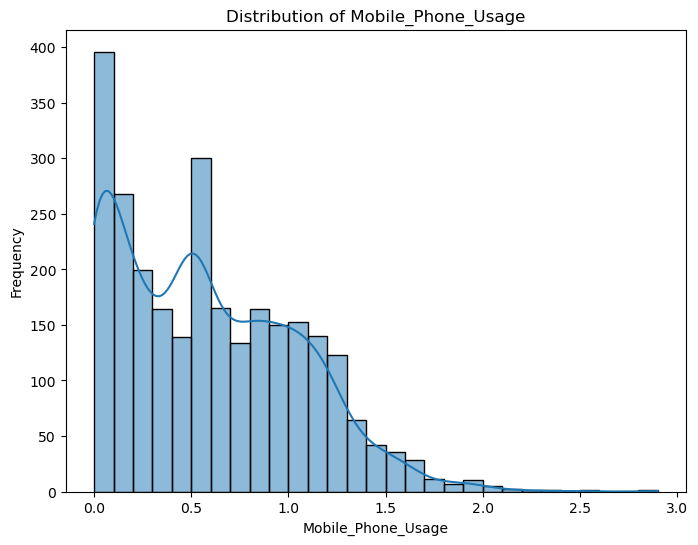

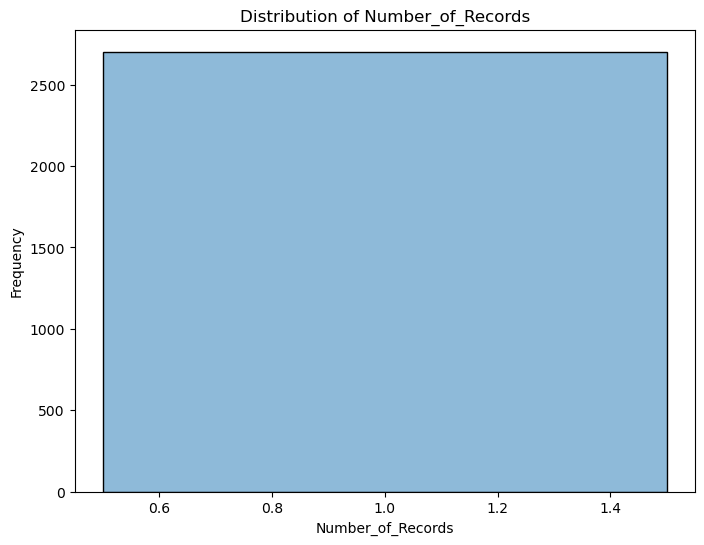

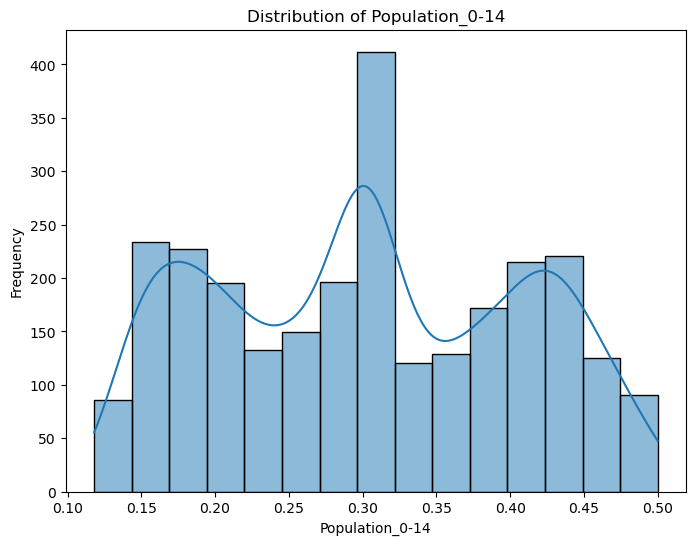

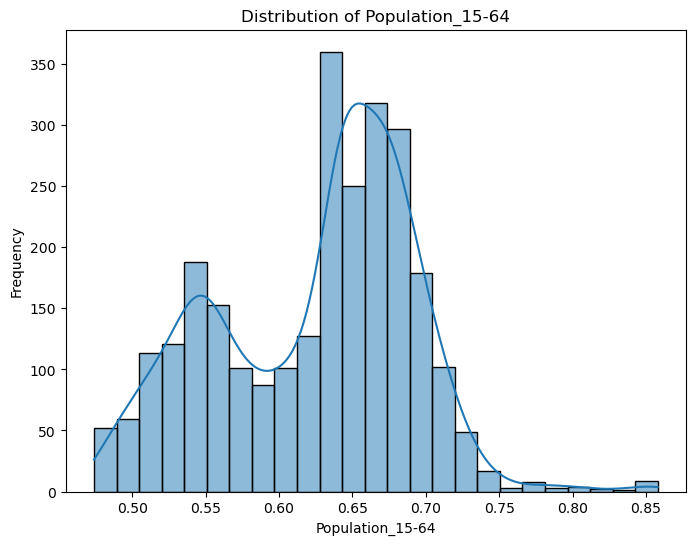

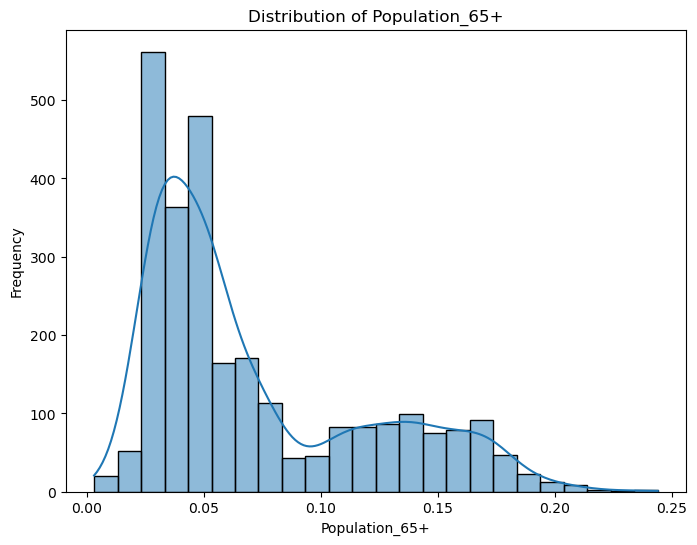

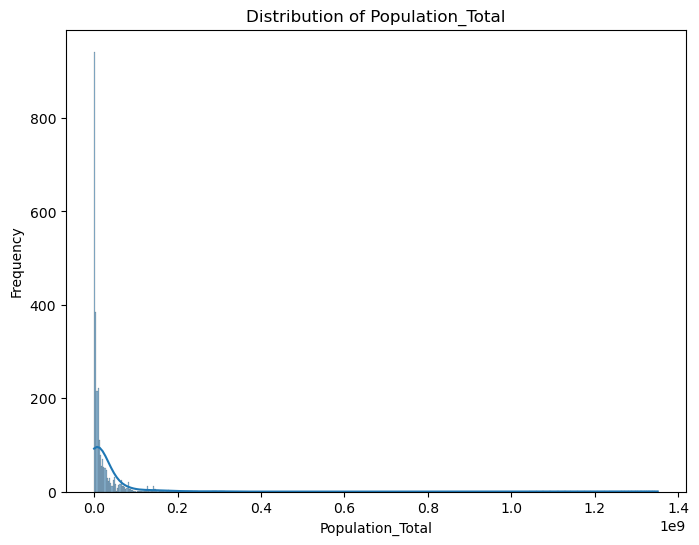

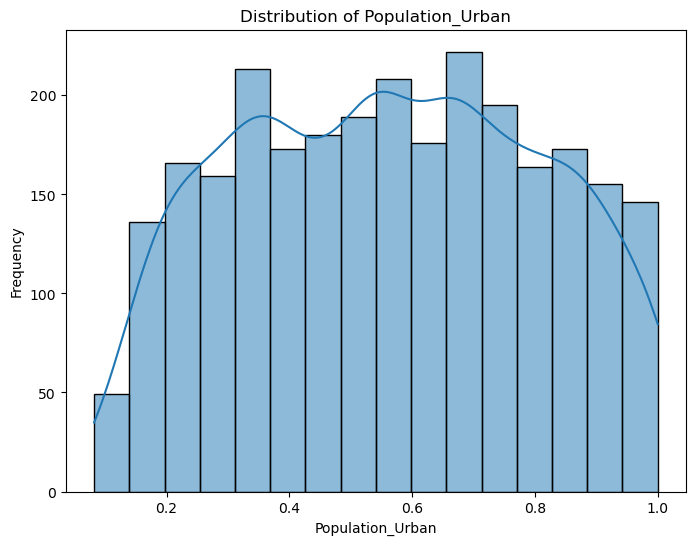

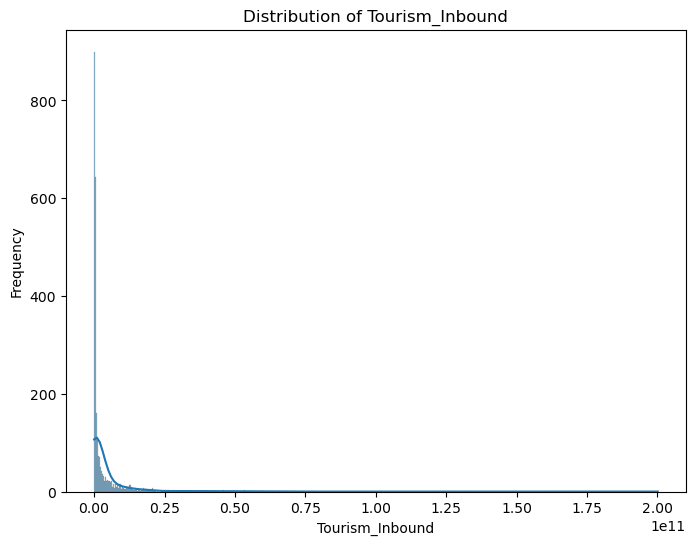

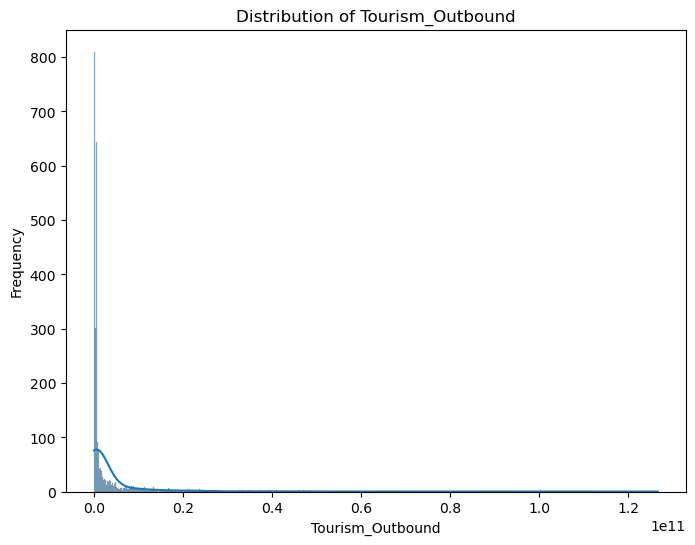

In [527]:
for column in data:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column], kde=True)  # Use histplot instead of distplot for the histogram
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)  # Set xlabel as the column name
    plt.ylabel("Frequency")  # Set ylabel as "Frequency" for a histogram
    plt.show()


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5]),
 [Text(0.5, 0, 'Birth_Rate'),
  Text(1.5, 0, 'Business_Tax_Rate'),
  Text(2.5, 0, 'CO2_Emissions'),
  Text(3.5, 0, 'Days_to_Start_Business'),
  Text(4.5, 0, 'Ease_of_Business'),
  Text(5.5, 0, 'Energy_Usage'),
  Text(6.5, 0, 'GDP'),
  Text(7.5, 0, 'Health_Exp_%_GDP'),
  Text(8.5, 0, 'Health_Exp/Capita'),
  Text(9.5, 0, 'Hours_to_do_Tax'),
  Text(10.5, 0, 'Infant_Mortality_Rate'),
  Text(11.5, 0, 'Internet_Usage'),
  Text(12.5, 0, 'Lending_Interest'),
  Text(13.5, 0, 'Life_Expectancy_Female'),
  Text(14.5, 0, 'Life_Expectancy_Male'),
  Text(15.5, 0, 'Mobile_Phone_Usage'),
  Text(16.5, 0, 'Number_of_Records'),
  Text(17.5, 0, 'Population_0-14'),
  Text(18.5, 0, 'Population_15-64'),
  Text(19.5, 0, 'Population_65+'),
  Text(20.5, 0, 'Population_Total'),
  Text(21.5, 0, 'Population_Urban'),
  Text(22.5, 0, 'Tourism_Inbound

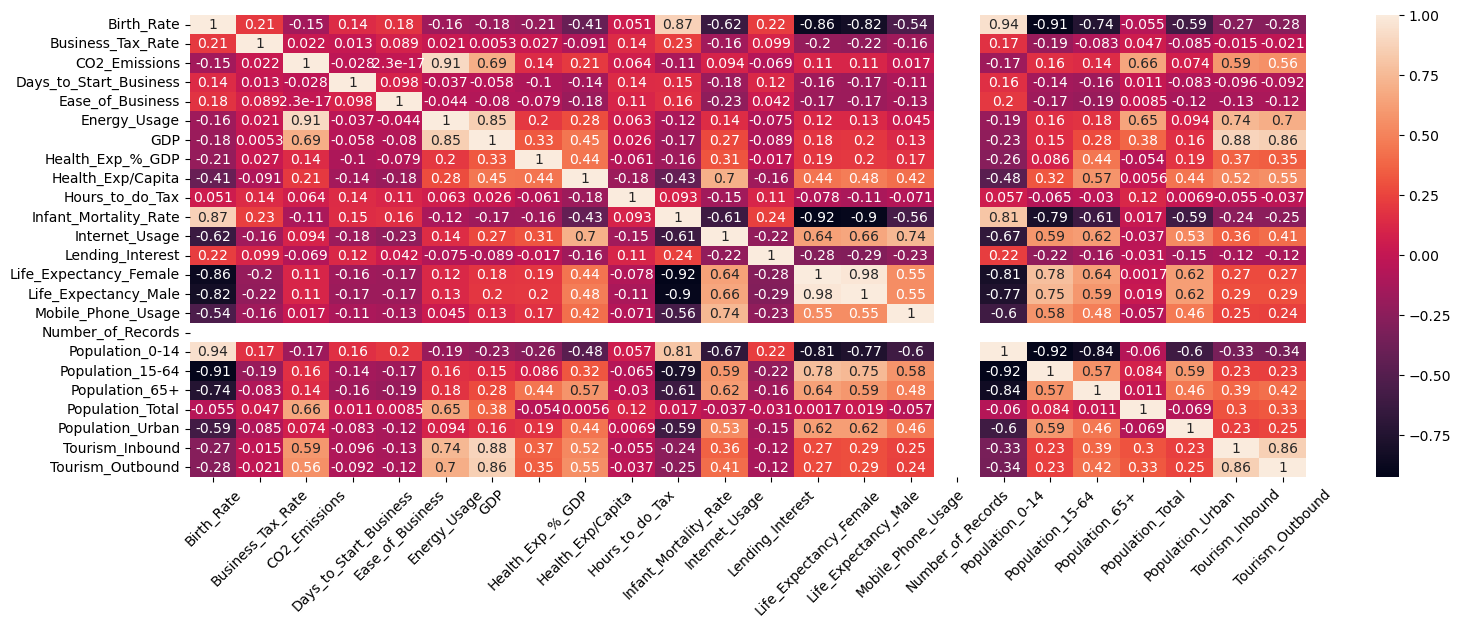

In [528]:
#Heatmap(test)
fig= plt.figure(figsize=(18, 6))
sns.heatmap(data.corr(), annot=True);
plt.xticks(rotation=45)

In [529]:
data.isna().sum()

Birth_Rate                0
Business_Tax_Rate         0
CO2_Emissions             0
Country                   0
Days_to_Start_Business    0
Ease_of_Business          0
Energy_Usage              0
GDP                       0
Health_Exp_%_GDP          0
Health_Exp/Capita         0
Hours_to_do_Tax           0
Infant_Mortality_Rate     0
Internet_Usage            0
Lending_Interest          0
Life_Expectancy_Female    0
Life_Expectancy_Male      0
Mobile_Phone_Usage        0
Number_of_Records         0
Population_0-14           0
Population_15-64          0
Population_65+            0
Population_Total          0
Population_Urban          0
Tourism_Inbound           0
Tourism_Outbound          0
dtype: int64

In [530]:
"""import matplotlib.pyplot as plt

import seaborn as sns

# Assuming 'data' is your DataFrame
sns.pairplot(data[data1])
plt.show()
"""

"import matplotlib.pyplot as plt\n\nimport seaborn as sns\n\n# Assuming 'data' is your DataFrame\nsns.pairplot(data[data1])\nplt.show()\n"

In [531]:

# Calculate the IQR for each numerical column
Q1 = data[data1].quantile(0.25)
Q3 = data[data1].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with values derived from IQR
for column in data1:
    data.loc[data[column] < lower_bound[column], column] = Q1[column] - 1.5 * IQR[column]
    data.loc[data[column] > upper_bound[column], column] = Q3[column] + 1.5 * IQR[column]

# Display the first few rows of the modified DataFrame
pd.DataFrame(data)


Birth_Rate  Business_Tax_Rate  CO2_Emissions                   Country  \
0          0.020          48.966901        87931.0                   Algeria   
1          0.050          48.966901         9542.0                    Angola   
2          0.043          48.966901         1617.0                     Benin   
3          0.027          48.966901         4276.0                  Botswana   
4          0.046          48.966901         1041.0              Burkina Faso   
...          ...                ...            ...                       ...   
2699       0.020          48.966901         8529.0  Turks and Caicos Islands   
2700       0.013          46.400000         8529.0             United States   
2701       0.015          41.900000         8529.0                   Uruguay   
2702       0.020          61.817252         8529.0             Venezuela, RB   
2703       0.011          48.966901         8529.0     Virgin Islands (U.S.)   

      Days_to_Start_Business  Ease_of_Business  Energy_Usage           GDP  \
0                     26.000         94.875676     26998.000  5.479006e+10   
1                     26.000         94.875676      7499.000  9.129595e+09   
2                     26.000         94.875676      1983.000  2.359122e+09   
3                     26.000         94.875676      1836.000  5.788312e+09   
4                     26.000         94.875676     14338.000  2.610959e+09   
...                      ...               ...           ...           ...   
2699                  26.000         94.875676     14338.000  1.507975e+10   
2700                   5.000         94.875676     46913.625  2.213750e+11   
2701                   7.000         94.875676     14338.000  5.000435e+10   
2702                  55.625         94.875676     14338.000  2.213750e+11   
2703                  26.000         94.875676     14338.000  1.507975e+10   

      Health_Exp_%_GDP  Health_Exp/Capita  ...  Life_Expectancy_Male  \
0              0.03500             60.000  ...                  67.0   
1              0.03400             22.000  ...                  44.0   
2              0.04300             15.000  ...                  53.0   
3              0.04700            152.000  ...                  49.0   
4              0.05100             12.000  ...                  49.0   
...                ...                ...  ...                   ...   
2699           0.06417            193.000  ...                  69.0   
2700           0.11800           1291.125  ...                  76.0   
2701           0.08900           1291.125  ...                  74.0   
2702           0.04600            593.000  ...                  72.0   
2703           0.06417            193.000  ...                  76.0   

      Mobile_Phone_Usage  Number_of_Records  Population_0-14  \
0                    0.0                  1         0.342000   
1                    0.0                  1         0.476000   
2                    0.0                  1         0.454000   
3                    0.1                  1         0.383000   
4                    0.0                  1         0.468000   
...                  ...                ...              ...   
2699                 0.5                  1         0.303051   
2700                 1.0                  1         0.196000   
2701                 1.5                  1         0.220000   
2702                 1.0                  1         0.288000   
2703                 0.5                  1         0.206000   

      Population_15-64  Population_65+  Population_Total  Population_Urban  \
0               0.6190           0.039      3.171945e+07             0.599   
1               0.4990           0.025      1.392493e+07             0.324   
2               0.5170           0.029      6.949366e+06             0.383   
3               0.5870           0.029      1.755375e+06             0.532   
4               0.5050           0.028      1.160794e+07             0.178   
...   

In [532]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth_Rate              2704 non-null   float64
 1   Business_Tax_Rate       2704 non-null   float64
 2   CO2_Emissions           2704 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days_to_Start_Business  2704 non-null   float64
 5   Ease_of_Business        2704 non-null   float64
 6   Energy_Usage            2704 non-null   float64
 7   GDP                     2704 non-null   float64
 8   Health_Exp_%_GDP        2704 non-null   float64
 9   Health_Exp/Capita       2704 non-null   float64
 10  Hours_to_do_Tax         2704 non-null   float64
 11  Infant_Mortality_Rate   2704 non-null   float64
 12  Internet_Usage          2704 non-null   float64
 13  Lending_Interest        2704 non-null   float64
 14  Life_Expectancy_Female  2704 non-null   

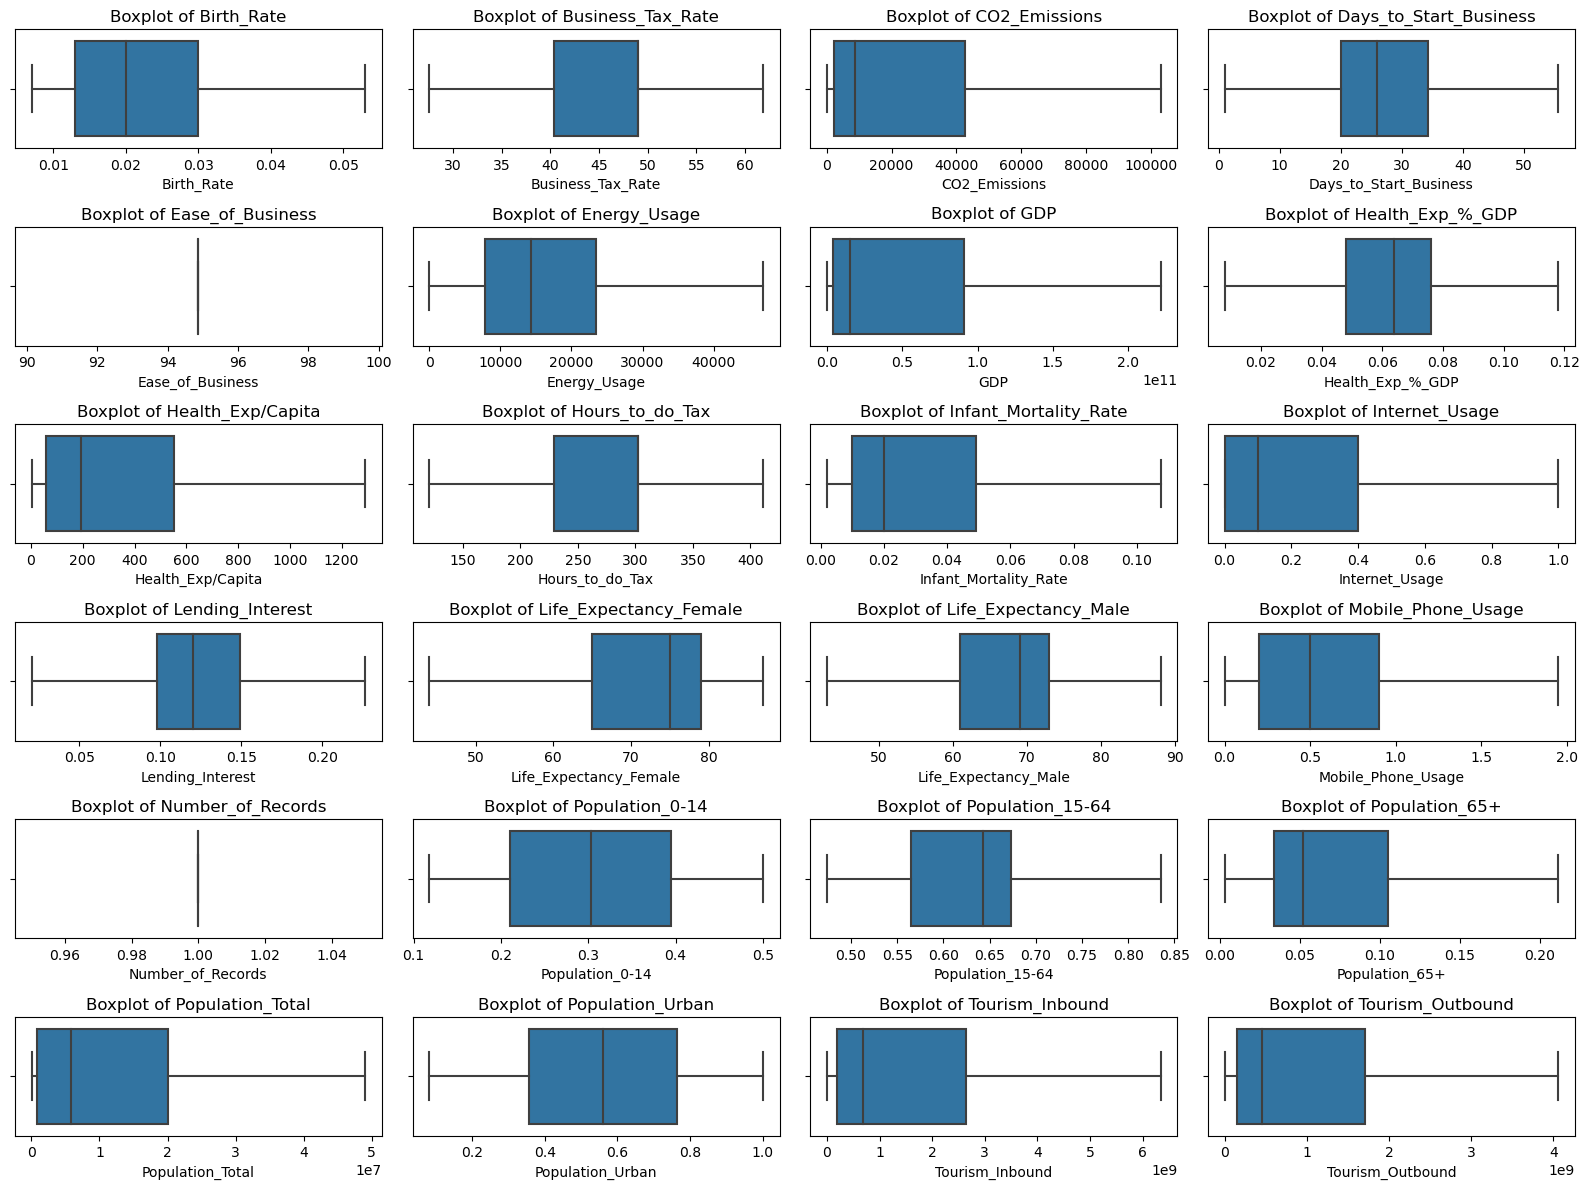

In [533]:
import seaborn as sns
import matplotlib.pyplot as plt

data1 = ['Birth_Rate', 'Business_Tax_Rate', 'CO2_Emissions',
         'Days_to_Start_Business', 'Ease_of_Business', 'Energy_Usage', 'GDP',
         'Health_Exp_%_GDP', 'Health_Exp/Capita', 'Hours_to_do_Tax',
         'Infant_Mortality_Rate', 'Internet_Usage', 'Lending_Interest',
         'Life_Expectancy_Female', 'Life_Expectancy_Male', 'Mobile_Phone_Usage',
         'Number_of_Records', 'Population_0-14', 'Population_15-64',
         'Population_65+', 'Population_Total', 'Population_Urban',
         'Tourism_Inbound', 'Tourism_Outbound']

# Calculate grid dimensions
num_cols = 4
num_rows = (len(data1) + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 12))

# Flatten axes in case num_rows > 1
axes = axes.flatten()

# Plot each feature
for i, column in enumerate(data1):
    sns.boxplot(x=data[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_xlabel(column)

# Remove any empty subplots
for i in range(len(data1), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [534]:
import plotly.express as px

# Assuming 'data' is your DataFrame
# Replace 'Birth_Rate' and 'CO2_Emissions' with actual column names
fig = px.scatter(data, x='Birth_Rate', y='CO2_Emissions', title='Scatter Plot',
                 labels={'Birth_Rate': 'Birth Rate', 'CO2_Emissions': 'CO2 Emissions'},
                 color_discrete_sequence=['red'], trendline='ols')
fig.show()


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5]),
 [Text(0.5, 0, 'Birth_Rate'),
  Text(1.5, 0, 'Business_Tax_Rate'),
  Text(2.5, 0, 'CO2_Emissions'),
  Text(3.5, 0, 'Days_to_Start_Business'),
  Text(4.5, 0, 'Ease_of_Business'),
  Text(5.5, 0, 'Energy_Usage'),
  Text(6.5, 0, 'GDP'),
  Text(7.5, 0, 'Health_Exp_%_GDP'),
  Text(8.5, 0, 'Health_Exp/Capita'),
  Text(9.5, 0, 'Hours_to_do_Tax'),
  Text(10.5, 0, 'Infant_Mortality_Rate'),
  Text(11.5, 0, 'Internet_Usage'),
  Text(12.5, 0, 'Lending_Interest'),
  Text(13.5, 0, 'Life_Expectancy_Female'),
  Text(14.5, 0, 'Life_Expectancy_Male'),
  Text(15.5, 0, 'Mobile_Phone_Usage'),
  Text(16.5, 0, 'Number_of_Records'),
  Text(17.5, 0, 'Population_0-14'),
  Text(18.5, 0, 'Population_15-64'),
  Text(19.5, 0, 'Population_65+'),
  Text(20.5, 0, 'Population_Total'),
  Text(21.5, 0, 'Population_Urban'),
  Text(22.5, 0, 'Tourism_Inbound

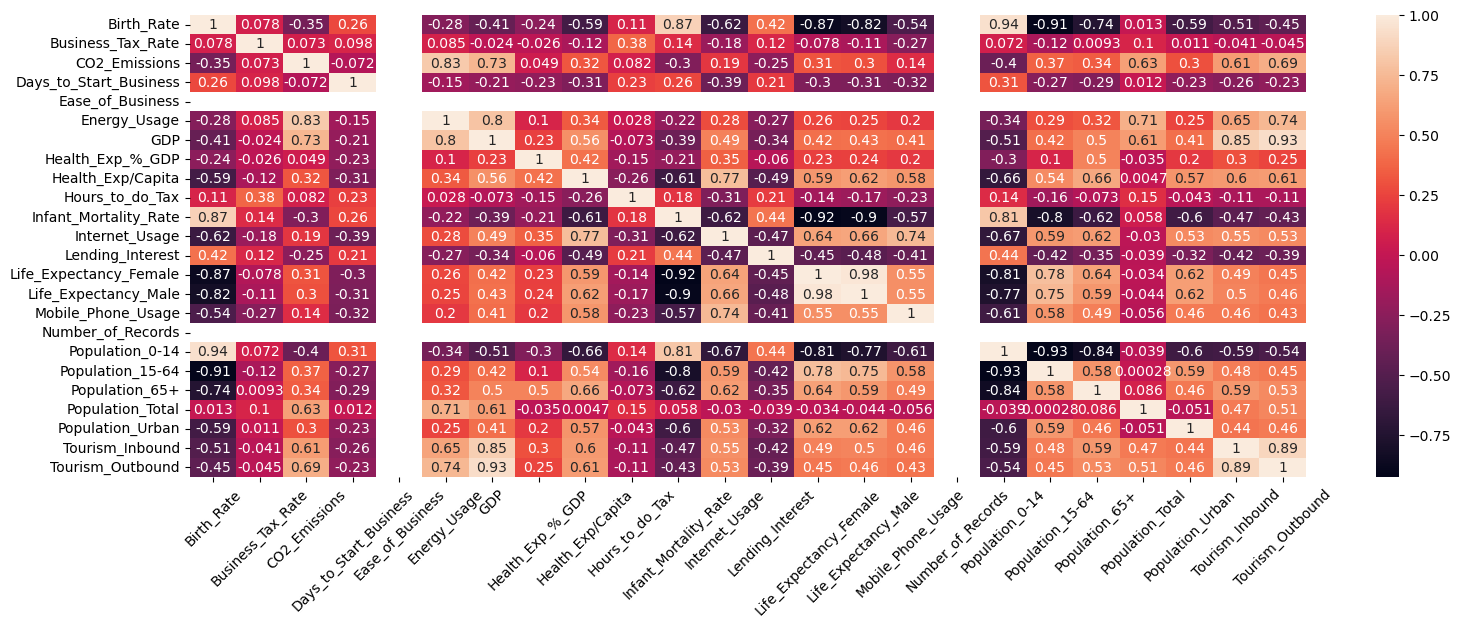

In [535]:
#Heatmap(test)
fig= plt.figure(figsize=(18, 6))
sns.heatmap(data.corr(), annot=True);
plt.xticks(rotation=45)

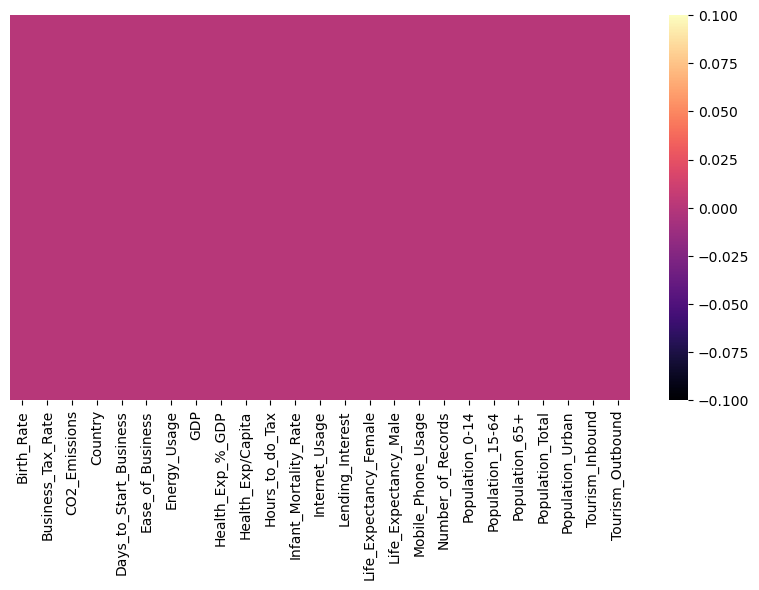

In [536]:
#visualizing the null values for each attribute
plt.figure(figsize=(10,5))
sns.heatmap(data.isnull(),cmap='magma',yticklabels=False,cbar=True)
plt.show()

In [537]:
data["Ease_of_Business"].value_counts()

94.875676    2704
Name: Ease_of_Business, dtype: int64

In [538]:
data["Number_of_Records"].value_counts() 

1    2704
Name: Number_of_Records, dtype: int64

In [539]:
data["Days_to_Start_Business"].value_counts()

26.000    1017
55.625     340
6.000       54
13.000      54
18.000      53
7.000       51
9.000       50
12.000      48
8.000       46
35.000      44
31.000      43
16.000      41
25.000      41
39.000      39
19.000      39
20.000      37
22.000      36
40.000      35
17.000      33
14.000      31
3.000       30
32.000      30
21.000      30
5.000       28
29.000      27
37.000      27
15.000      26
11.000      26
27.000      26
10.000      24
24.000      21
46.000      20
38.000      20
45.000      19
47.000      17
41.000      15
34.000      14
43.000      14
28.000      14
36.000      14
33.000      14
30.000      14
4.000       13
48.000      13
51.000      11
50.000      11
44.000      11
42.000      10
23.000       9
49.000       6
52.000       5
1.000        5
54.000       3
2.000        3
55.000       1
53.000       1
Name: Days_to_Start_Business, dtype: int64

In [540]:
data["Mobile_Phone_Usage"].value_counts()

0.00    396
0.50    300
0.10    268
0.20    199
0.60    165
0.30    164
0.80    164
1.00    153
0.90    150
1.10    140
0.40    139
0.70    134
1.20    123
1.30     64
1.40     42
1.50     36
1.60     28
1.70     11
1.95     11
1.90     10
1.80      7
Name: Mobile_Phone_Usage, dtype: int64

In [541]:
## Drop "Number of Records" column
data = data.drop(['Number_of_Records'],axis=1)

In [542]:
 ## Drop "Ease_of_Business" column
data = data.drop(['Ease_of_Business'],axis=1)

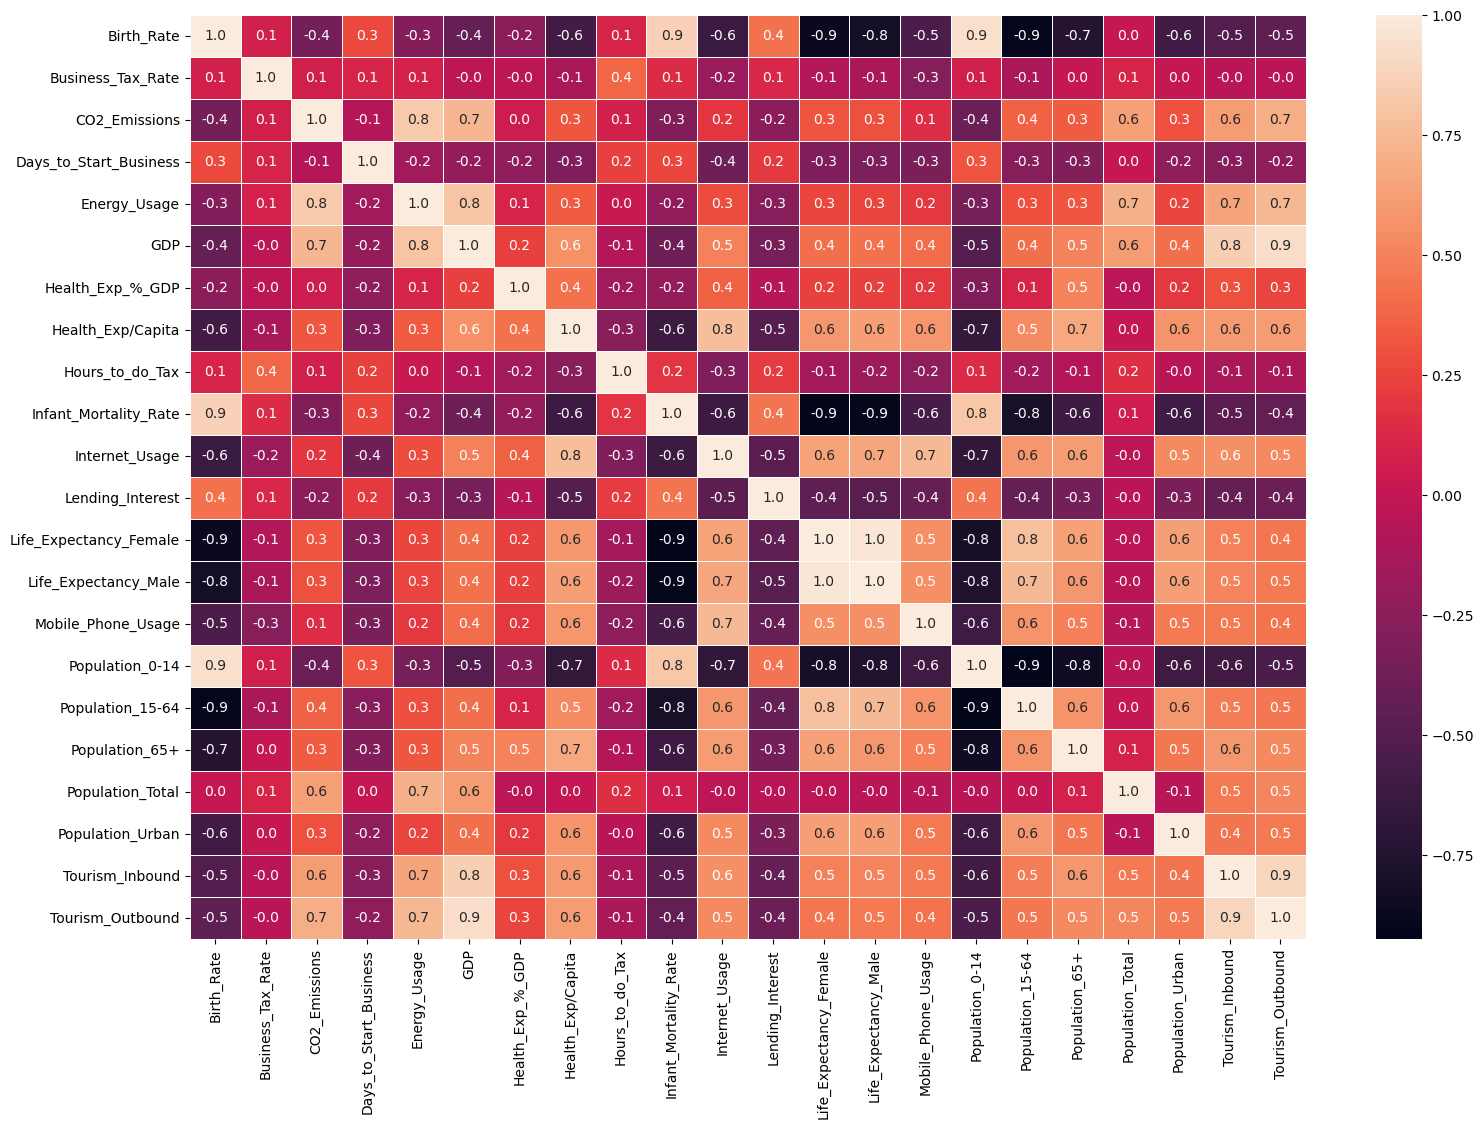

In [543]:
f,ax = plt.subplots(figsize=(18,12))
sns.heatmap(data.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

In [544]:
data = data.drop(["Tourism_Outbound"], axis=1)

In [545]:
data = data.drop(["Life_Expectancy_Male"], axis=1)

In [546]:
data = data.drop(["Population_0-14"], axis=1)

In [547]:
data = data.drop(["Infant_Mortality_Rate"], axis=1)

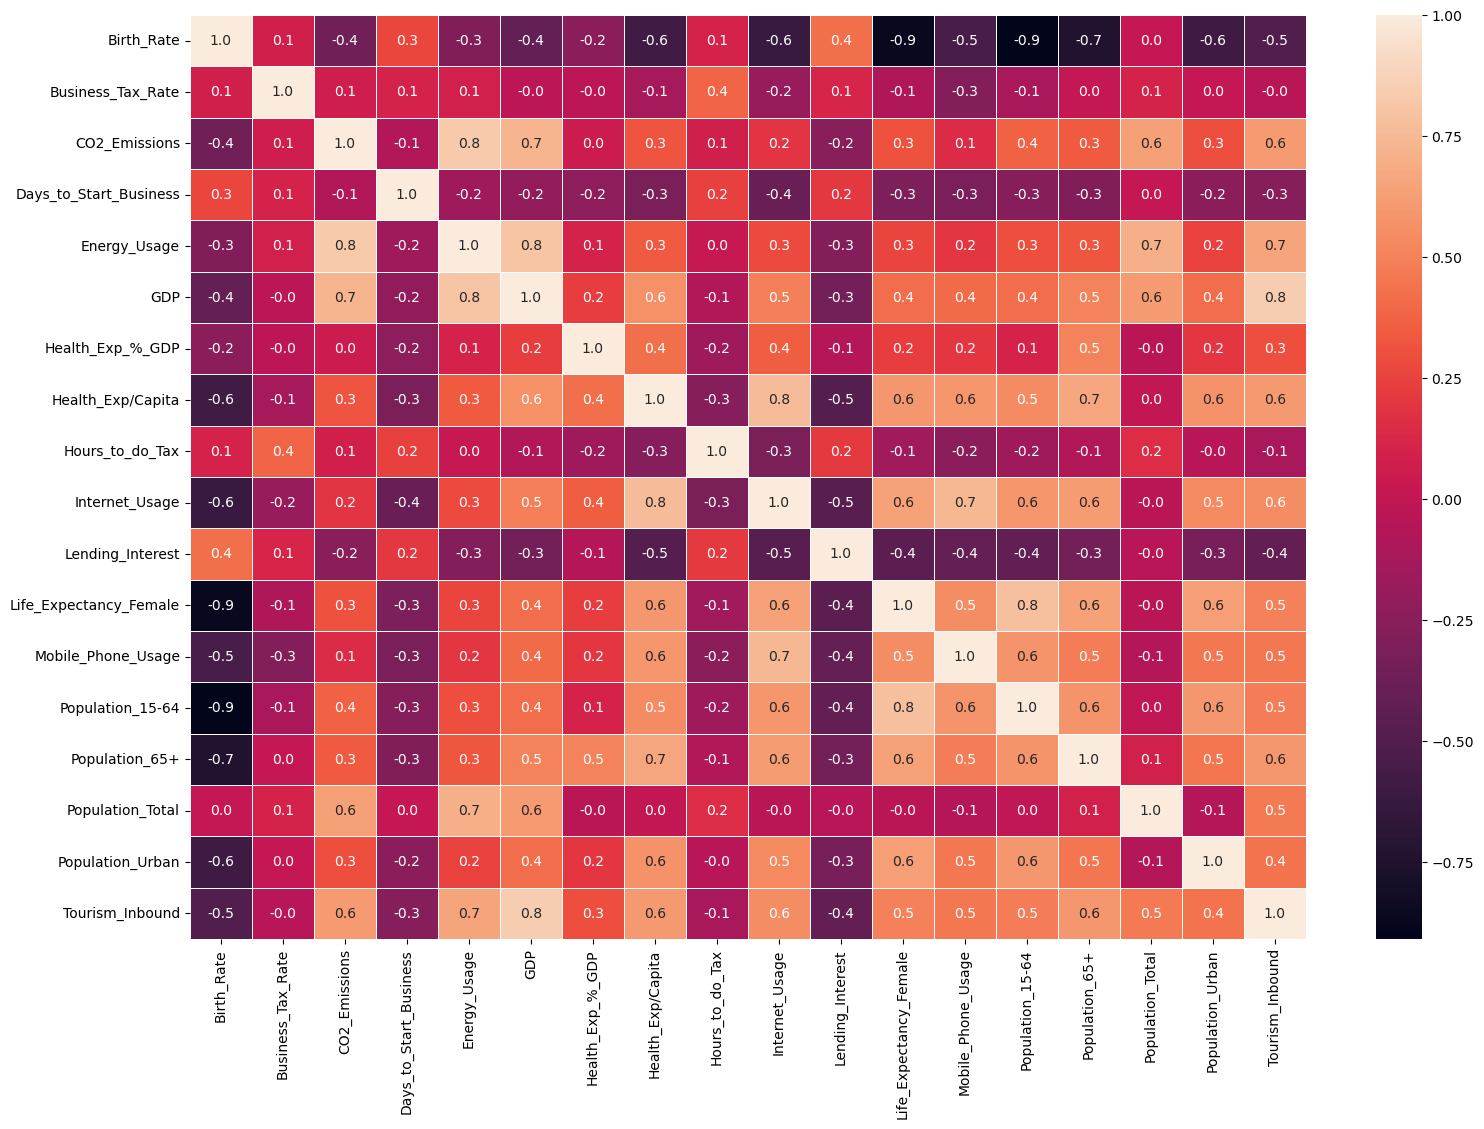

In [548]:
f,ax = plt.subplots(figsize=(18,12))
sns.heatmap(data.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

In [549]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth_Rate              2704 non-null   float64
 1   Business_Tax_Rate       2704 non-null   float64
 2   CO2_Emissions           2704 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days_to_Start_Business  2704 non-null   float64
 5   Energy_Usage            2704 non-null   float64
 6   GDP                     2704 non-null   float64
 7   Health_Exp_%_GDP        2704 non-null   float64
 8   Health_Exp/Capita       2704 non-null   float64
 9   Hours_to_do_Tax         2704 non-null   float64
 10  Internet_Usage          2704 non-null   float64
 11  Lending_Interest        2704 non-null   float64
 12  Life_Expectancy_Female  2704 non-null   float64
 13  Mobile_Phone_Usage      2704 non-null   float64
 14  Population_15-64        2704 non-null   

In [550]:
Data_Kmean = data.copy() # kmeans
Data_Kmean

Birth_Rate  Business_Tax_Rate  CO2_Emissions                   Country  \
0          0.020          48.966901        87931.0                   Algeria   
1          0.050          48.966901         9542.0                    Angola   
2          0.043          48.966901         1617.0                     Benin   
3          0.027          48.966901         4276.0                  Botswana   
4          0.046          48.966901         1041.0              Burkina Faso   
...          ...                ...            ...                       ...   
2699       0.020          48.966901         8529.0  Turks and Caicos Islands   
2700       0.013          46.400000         8529.0             United States   
2701       0.015          41.900000         8529.0                   Uruguay   
2702       0.020          61.817252         8529.0             Venezuela, RB   
2703       0.011          48.966901         8529.0     Virgin Islands (U.S.)   

      Days_to_Start_Business  Energy_Usage           GDP  Health_Exp_%_GDP  \
0                     26.000     26998.000  5.479006e+10           0.03500   
1                     26.000      7499.000  9.129595e+09           0.03400   
2                     26.000      1983.000  2.359122e+09           0.04300   
3                     26.000      1836.000  5.788312e+09           0.04700   
4                     26.000     14338.000  2.610959e+09           0.05100   
...                      ...           ...           ...               ...   
2699                  26.000     14338.000  1.507975e+10           0.06417   
2700                   5.000     46913.625  2.213750e+11           0.11800   
2701                   7.000     14338.000  5.000435e+10           0.08900   
2702                  55.625     14338.000  2.213750e+11           0.04600   
2703                  26.000     14338.000  1.507975e+10           0.06417   

      Health_Exp/Capita  Hours_to_do_Tax  Internet_Usage  Lending_Interest  \
0                60.000       302.068503             0.0            0.1000   
1                22.000       302.068503             0.0            0.2265   
2                15.000       302.068503             0.0            0.1200   
3               152.000       302.068503             0.0            0.1550   
4                12.000       302.068503             0.0            0.1200   
...                 ...              ...             ...               ...   
2699            193.000       302.068503             0.1            0.1200   
2700           1291.125       175.000000             0.8            0.0330   
2701           1291.125       310.000000             0.5            0.1120   
2702            593.000       410.921257             0.5            0.1640   
2703            193.000       302.068503             0.4            0.1200   

      Life_Expectancy_Female  Mobile_Phone_Usage  Population_15-64  \
0                       71.0                 0.0            0.6190   
1                       47.0                 0.0            0.4990   
2                       57.0                 0.0            0.5170   
3                       52.0                 0.1            0.5870   
4                       52.0                 0.0            0.5050   
...                      ...                 ...               ...   
2699                    75.0                 0.5            0.6425   
2700                    81.0                 1.0            0.6670   
2701                    80.0                 1.5            0.6390   
2702                    78.0                 1.0            0.6520   
2703                    83.0                 0.5            0.6410   

      Population_65+  Population_Total  Population_Urban  Tourism_Inbound  
0              0.039      3.171945e+07             0.599     1.020000e+08  
1              0.025      1.392493e+07             0.324     3.400000e+07  
2              0.029      6.949366e+06             0.383     7.700000e+07  
3              0.029      

In [551]:
# Assuming 'df' is your DataFrame containing the data
country_column = Data_Kmean['Country']  # Extract the 'Country' column
Data_Kmean.drop(columns=['Country'], inplace=True)  # Drop the 'Country' column from the DataFrame
Data_Kmean['Country'] = country_column  # Add the 'Country' column at the end


In [552]:
Data_Kmean

Birth_Rate  Business_Tax_Rate  CO2_Emissions  Days_to_Start_Business  \
0          0.020          48.966901        87931.0                  26.000   
1          0.050          48.966901         9542.0                  26.000   
2          0.043          48.966901         1617.0                  26.000   
3          0.027          48.966901         4276.0                  26.000   
4          0.046          48.966901         1041.0                  26.000   
...          ...                ...            ...                     ...   
2699       0.020          48.966901         8529.0                  26.000   
2700       0.013          46.400000         8529.0                   5.000   
2701       0.015          41.900000         8529.0                   7.000   
2702       0.020          61.817252         8529.0                  55.625   
2703       0.011          48.966901         8529.0                  26.000   

      Energy_Usage           GDP  Health_Exp_%_GDP  Health_Exp/Capita  \
0        26998.000  5.479006e+10           0.03500             60.000   
1         7499.000  9.129595e+09           0.03400             22.000   
2         1983.000  2.359122e+09           0.04300             15.000   
3         1836.000  5.788312e+09           0.04700            152.000   
4        14338.000  2.610959e+09           0.05100             12.000   
...            ...           ...               ...                ...   
2699     14338.000  1.507975e+10           0.06417            193.000   
2700     46913.625  2.213750e+11           0.11800           1291.125   
2701     14338.000  5.000435e+10           0.08900           1291.125   
2702     14338.000  2.213750e+11           0.04600            593.000   
2703     14338.000  1.507975e+10           0.06417            193.000   

      Hours_to_do_Tax  Internet_Usage  Lending_Interest  \
0          302.068503             0.0            0.1000   
1          302.068503             0.0            0.2265   
2          302.068503             0.0            0.1200   
3          302.068503             0.0            0.1550   
4          302.068503             0.0            0.1200   
...               ...             ...               ...   
2699       302.068503             0.1            0.1200   
2700       175.000000             0.8            0.0330   
2701       310.000000             0.5            0.1120   
2702       410.921257             0.5            0.1640   
2703       302.068503             0.4            0.1200   

      Life_Expectancy_Female  Mobile_Phone_Usage  Population_15-64  \
0                       71.0                 0.0            0.6190   
1                       47.0                 0.0            0.4990   
2                       57.0                 0.0            0.5170   
3                       52.0                 0.1            0.5870   
4                       52.0                 0.0            0.5050   
...                      ...                 ...               ...   
2699                    75.0                 0.5            0.6425   
2700                    81.0                 1.0            0.6670   
2701                    80.0                 1.5            0.6390   
2702                    78.0                 1.0            0.6520   
2703                    83.0                 0.5            0.6410   

      Population_65+  Population_Total  Population_Urban  Tourism_Inbound  \
0              0.039      3.171945e+07             0.599     1.020000e+08   
1              0.025      1.392493e+07             0.324     3.400000e+07   
2              0.029      6.949366e+06             0.383     7.700000e+07   
3              0.029      1.755375e+06             0.532     2.270000e+08   
4              0.028      1.160794e+07             0.178     2.300000e+07   
...              ...               ...               ...              ...   
2699           0.052      3.242700e+04             0.911     6.885000e+08   
2700           0.136      

# Perfroming Model Encoding for the Country column

In [553]:
data["Country"].unique()


array(['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cameroon', 'Central African Republic', 'Chad',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire",
       'Djibouti', 'Egypt, Arab Rep.', 'Equatorial Guinea', 'Eritrea',
       'Ethiopia', 'Gabon', 'Gambia, The', 'Ghana', 'Guinea',
       'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya',
       'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius',
       'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda',
       'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone',
       'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Swaziland',
       'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe',
       'Afghanistan', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Bhutan',
       'Brunei Darussalam', 'Cambodia', 'China', 'Georgia',
       'Hong Kong SAR, China', 'India', 'Indonesia', 'Japan',
       'Kazakhstan', 'Korea, Dem. Rep.', 'Korea, Rep.', 

In [554]:
Data_Country = data.copy

In [555]:
data

Birth_Rate  Business_Tax_Rate  CO2_Emissions                   Country  \
0          0.020          48.966901        87931.0                   Algeria   
1          0.050          48.966901         9542.0                    Angola   
2          0.043          48.966901         1617.0                     Benin   
3          0.027          48.966901         4276.0                  Botswana   
4          0.046          48.966901         1041.0              Burkina Faso   
...          ...                ...            ...                       ...   
2699       0.020          48.966901         8529.0  Turks and Caicos Islands   
2700       0.013          46.400000         8529.0             United States   
2701       0.015          41.900000         8529.0                   Uruguay   
2702       0.020          61.817252         8529.0             Venezuela, RB   
2703       0.011          48.966901         8529.0     Virgin Islands (U.S.)   

      Days_to_Start_Business  Energy_Usage           GDP  Health_Exp_%_GDP  \
0                     26.000     26998.000  5.479006e+10           0.03500   
1                     26.000      7499.000  9.129595e+09           0.03400   
2                     26.000      1983.000  2.359122e+09           0.04300   
3                     26.000      1836.000  5.788312e+09           0.04700   
4                     26.000     14338.000  2.610959e+09           0.05100   
...                      ...           ...           ...               ...   
2699                  26.000     14338.000  1.507975e+10           0.06417   
2700                   5.000     46913.625  2.213750e+11           0.11800   
2701                   7.000     14338.000  5.000435e+10           0.08900   
2702                  55.625     14338.000  2.213750e+11           0.04600   
2703                  26.000     14338.000  1.507975e+10           0.06417   

      Health_Exp/Capita  Hours_to_do_Tax  Internet_Usage  Lending_Interest  \
0                60.000       302.068503             0.0            0.1000   
1                22.000       302.068503             0.0            0.2265   
2                15.000       302.068503             0.0            0.1200   
3               152.000       302.068503             0.0            0.1550   
4                12.000       302.068503             0.0            0.1200   
...                 ...              ...             ...               ...   
2699            193.000       302.068503             0.1            0.1200   
2700           1291.125       175.000000             0.8            0.0330   
2701           1291.125       310.000000             0.5            0.1120   
2702            593.000       410.921257             0.5            0.1640   
2703            193.000       302.068503             0.4            0.1200   

      Life_Expectancy_Female  Mobile_Phone_Usage  Population_15-64  \
0                       71.0                 0.0            0.6190   
1                       47.0                 0.0            0.4990   
2                       57.0                 0.0            0.5170   
3                       52.0                 0.1            0.5870   
4                       52.0                 0.0            0.5050   
...                      ...                 ...               ...   
2699                    75.0                 0.5            0.6425   
2700                    81.0                 1.0            0.6670   
2701                    80.0                 1.5            0.6390   
2702                    78.0                 1.0            0.6520   
2703                    83.0                 0.5            0.6410   

      Population_65+  Population_Total  Population_Urban  Tourism_Inbound  
0              0.039      3.171945e+07             0.599     1.020000e+08  
1              0.025      1.392493e+07             0.324     3.400000e+07  
2              0.029      6.949366e+06             0.383     7.700000e+07  
3              0.029      

In [556]:
# Create a LabelEncoder object
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['COUNTRY']=le.fit_transform(data['Country'])
data['COUNTRY']=data['COUNTRY'].astype(float)

In [557]:
data['COUNTRY'].value_counts().head(60)

2.0      13
5.0      13
191.0    13
195.0    13
197.0    13
14.0     13
86.0     13
87.0     13
90.0     13
94.0     13
101.0    13
105.0    13
141.0    13
151.0    13
158.0    13
182.0    13
196.0    13
205.0    13
3.0      13
10.0     13
62.0     13
65.0     13
74.0     13
97.0     13
120.0    13
181.0    13
180.0    13
171.0    13
125.0    13
88.0     13
89.0     13
91.0     13
100.0    13
104.0    13
109.0    13
110.0    13
111.0    13
113.0    13
119.0    13
126.0    13
166.0    13
128.0    13
134.0    13
140.0    13
148.0    13
149.0    13
152.0    13
153.0    13
156.0    13
160.0    13
165.0    13
124.0    13
135.0    13
136.0    13
150.0    13
75.0     13
78.0     13
79.0     13
80.0     13
92.0     13
Name: COUNTRY, dtype: int64

In [558]:
data = data.drop(['Country'],axis=1)

In [559]:
K_Data = data.copy()  #method for Kmeans

In [614]:
#Using minmax scaler

from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
MS = MinMaxScaler()

# Apply MinMaxScaler to the specified columns
data[['Birth_Rate', 'Business_Tax_Rate', 'CO2_Emissions', 'Days_to_Start_Business', 
      'Energy_Usage', 'GDP', 'Health_Exp_%_GDP', 'Health_Exp/Capita', 
      'Hours_to_do_Tax','Internet_Usage', 
      'Lending_Interest', 'Life_Expectancy_Female', 
      'Mobile_Phone_Usage','Population_15-64', 
      'Population_65+', 'Population_Total', 'Population_Urban', 
      'Tourism_Inbound']] = MS.fit_transform(data[['Birth_Rate', 
      'Business_Tax_Rate', 'CO2_Emissions', 'Days_to_Start_Business', 'Energy_Usage', 
      'GDP', 'Health_Exp_%_GDP', 'Health_Exp/Capita', 'Hours_to_do_Tax','Internet_Usage', 'Lending_Interest', 
      'Life_Expectancy_Female','Mobile_Phone_Usage','Population_15-64', 'Population_65+', 'Population_Total', 
      'Population_Urban', 'Tourism_Inbound']])

DATA_X1 = data.iloc[:,0:20]
DATA_X1

Birth_Rate  Business_Tax_Rate  CO2_Emissions  Days_to_Start_Business  \
0       0.282609           0.625000       0.853279                0.457666   
1       0.934783           0.625000       0.092535                0.457666   
2       0.782609           0.625000       0.015625                0.457666   
3       0.434783           0.625000       0.041430                0.457666   
4       0.847826           0.625000       0.010035                0.457666   
...          ...                ...            ...                     ...   
2699    0.282609           0.625000       0.082704                0.457666   
2700    0.130435           0.550092       0.082704                0.073227   
2701    0.173913           0.418773       0.082704                0.109840   
2702    0.282609           1.000000       0.082704                1.000000   
2703    0.086957           0.625000       0.082704                0.457666   

      Energy_Usage       GDP  Health_Exp_%_GDP  Health_Exp/Capita  \
0         0.575411  0.247284          0.245455           0.044992   
1         0.159704  0.040967          0.236364           0.015514   
2         0.042106  0.010375          0.318182           0.010084   
3         0.038972  0.025869          0.354545           0.116358   
4         0.305507  0.011513          0.390909           0.007757   
...            ...       ...               ...                ...   
2699      0.305507  0.067853          0.510632           0.148163   
2700      1.000000  1.000000          1.000000           1.000000   
2701      0.305507  0.225660          0.736364           1.000000   
2702      0.305507  1.000000          0.345455           0.458450   
2703      0.305507  0.067853          0.510632           0.148163   

      Hours_to_do_Tax  Internet_Usage  Lending_Interest  \
0            0.625000             0.0          0.385922   
1            0.625000             0.0          1.000000   
2            0.625000             0.0          0.483010   
3            0.625000             0.0          0.652913   
4            0.625000             0.0          0.483010   
...               ...             ...               ...   
2699         0.625000             0.1          0.483010   
2700         0.187246             0.8          0.060680   
2701         0.652324             0.5          0.444175   
2702         1.000000             0.5          0.696602   
2703         0.625000             0.4          0.483010   

      Life_Expectancy_Female  Mobile_Phone_Usage  Population_15-64  \
0                   0.627907            0.000000          0.401662   
1                   0.069767            0.000000          0.069252   
2                   0.302326            0.000000          0.119114   
3                   0.186047            0.051282          0.313019   
4                   0.186047            0.000000          0.085873   
...                      ...                 ...               ...   
2699                0.720930            0.256410          0.466759   
2700                0.860465            0.512821          0.534626   
2701                0.837209            0.769231          0.457064   
2702                0.790698            0.512821          0.493075   
2703                0.906977            0.256410          0.462604   

      Population_65+  Population_Total  Population_Urban  Tourism_Inbound  \
0           0.172662          0.646741          0.563181         0.015977   
1           0.105516          0.283705          0.263617         0.005252   
2           0.124700          0.141393          0.327887         0.012034   
3           0.124700          0.035427          0.490196         0.035692   
4           0.119904          0.236435          0.104575         0.003517   
...              ...               ...               ...              ...   
2699        0.235012          0.000276          0.903050         0.108481   
2700        0.637890          1.000000          0.794118         1.000000 

In [615]:
from sklearn.decomposition import PCA
PCA1 = PCA()

Data_MinMax = PCA1.fit_transform(DATA_X1)
DATA_X1

Birth_Rate  Business_Tax_Rate  CO2_Emissions  Days_to_Start_Business  \
0       0.282609           0.625000       0.853279                0.457666   
1       0.934783           0.625000       0.092535                0.457666   
2       0.782609           0.625000       0.015625                0.457666   
3       0.434783           0.625000       0.041430                0.457666   
4       0.847826           0.625000       0.010035                0.457666   
...          ...                ...            ...                     ...   
2699    0.282609           0.625000       0.082704                0.457666   
2700    0.130435           0.550092       0.082704                0.073227   
2701    0.173913           0.418773       0.082704                0.109840   
2702    0.282609           1.000000       0.082704                1.000000   
2703    0.086957           0.625000       0.082704                0.457666   

      Energy_Usage       GDP  Health_Exp_%_GDP  Health_Exp/Capita  \
0         0.575411  0.247284          0.245455           0.044992   
1         0.159704  0.040967          0.236364           0.015514   
2         0.042106  0.010375          0.318182           0.010084   
3         0.038972  0.025869          0.354545           0.116358   
4         0.305507  0.011513          0.390909           0.007757   
...            ...       ...               ...                ...   
2699      0.305507  0.067853          0.510632           0.148163   
2700      1.000000  1.000000          1.000000           1.000000   
2701      0.305507  0.225660          0.736364           1.000000   
2702      0.305507  1.000000          0.345455           0.458450   
2703      0.305507  0.067853          0.510632           0.148163   

      Hours_to_do_Tax  Internet_Usage  Lending_Interest  \
0            0.625000             0.0          0.385922   
1            0.625000             0.0          1.000000   
2            0.625000             0.0          0.483010   
3            0.625000             0.0          0.652913   
4            0.625000             0.0          0.483010   
...               ...             ...               ...   
2699         0.625000             0.1          0.483010   
2700         0.187246             0.8          0.060680   
2701         0.652324             0.5          0.444175   
2702         1.000000             0.5          0.696602   
2703         0.625000             0.4          0.483010   

      Life_Expectancy_Female  Mobile_Phone_Usage  Population_15-64  \
0                   0.627907            0.000000          0.401662   
1                   0.069767            0.000000          0.069252   
2                   0.302326            0.000000          0.119114   
3                   0.186047            0.051282          0.313019   
4                   0.186047            0.000000          0.085873   
...                      ...                 ...               ...   
2699                0.720930            0.256410          0.466759   
2700                0.860465            0.512821          0.534626   
2701                0.837209            0.769231          0.457064   
2702                0.790698            0.512821          0.493075   
2703                0.906977            0.256410          0.462604   

      Population_65+  Population_Total  Population_Urban  Tourism_Inbound  \
0           0.172662          0.646741          0.563181         0.015977   
1           0.105516          0.283705          0.263617         0.005252   
2           0.124700          0.141393          0.327887         0.012034   
3           0.124700          0.035427          0.490196         0.035692   
4           0.119904          0.236435          0.104575         0.003517   
...              ...               ...               ...              ...   
2699        0.235012          0.000276          0.903050         0.108481   
2700        0.637890          1.000000          0.794118         1.000000 

In [616]:
PCA1.explained_variance_

array([3.60658973e+03, 6.26269358e-01, 2.64898424e-01, 9.85186223e-02,
       6.64174965e-02, 5.60539638e-02, 4.79376507e-02, 4.37818502e-02,
       4.03968440e-02, 3.64032872e-02, 3.16237994e-02, 2.65339049e-02,
       2.17761211e-02, 1.58656798e-02, 1.31569218e-02, 1.23649358e-02,
       1.07620189e-02, 9.11865855e-03, 2.09570560e-03])

In [617]:
var1 = PCA1.explained_variance_ratio_
var1

array([9.99605330e-01, 1.73577322e-04, 7.34194617e-05, 2.73055011e-05,
       1.84083271e-05, 1.55359620e-05, 1.32864381e-05, 1.21346131e-05,
       1.11964220e-05, 1.00895646e-05, 8.76487786e-06, 7.35415857e-06,
       6.03548736e-06, 4.39734465e-06, 3.64658310e-06, 3.42707562e-06,
       2.98280986e-06, 2.52733479e-06, 5.80847461e-07])

In [618]:
# Cumulative variance
cvar1=np.cumsum(np.round(var1,decimals=4)*100)
cvar1# 45   45+16=61   61+5=66 and so on

array([99.96, 99.98, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99,
       99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99,
       99.99])

In [619]:
PCA1.components_ # 23 dimensional components

array([[ 1.52743226e-04, -5.18301276e-04,  3.62400786e-04,
        -1.15452260e-04,  5.11114495e-04,  2.28517214e-04,
         9.68483170e-06, -1.32064817e-04, -5.41152599e-04,
        -1.28454880e-04,  6.26885863e-05, -4.17354042e-05,
        -8.97534043e-05, -8.96325806e-05, -1.85608987e-04,
         4.60706295e-04, -5.27005447e-04,  1.48270717e-04,
         9.99999177e-01],
       [-2.09784696e-01, -2.05144060e-02,  3.25951264e-01,
        -1.10981009e-01,  2.99565469e-01,  4.16948306e-01,
         8.24786565e-02,  3.31677752e-01, -5.06753898e-02,
         2.25107010e-01, -1.53575903e-01,  2.05938394e-01,
         1.72848783e-01,  1.54446510e-01,  2.03808446e-01,
         1.94788023e-01,  2.01742998e-01,  4.04304309e-01,
        -2.71381287e-04],
       [ 1.97327904e-01,  1.57814741e-01,  3.50339050e-01,
         1.47550642e-01,  3.19760882e-01,  2.03033530e-01,
        -1.01862329e-01, -2.94058866e-01,  2.15181725e-01,
        -2.56064381e-01,  1.21278727e-01, -2.11581268e-01,
    

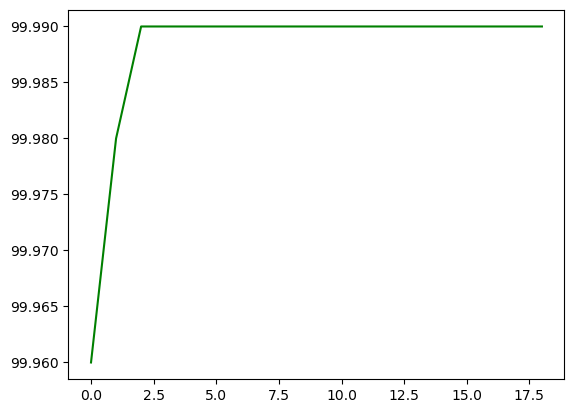

In [620]:
plt.plot(cvar1, color="green")

# Model Building Of Hierarchy

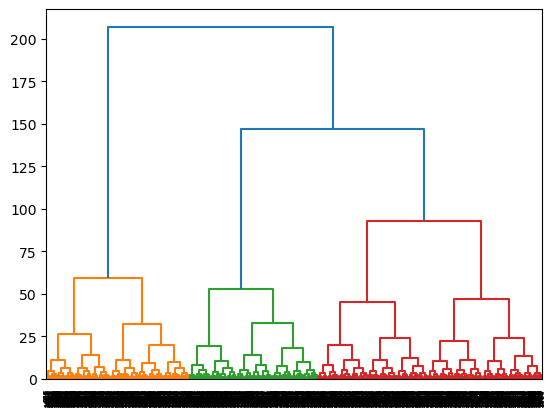

In [621]:
#creating dendogram 
import scipy.cluster.hierarchy as sch
sch.dendrogram(sch.linkage(DATA_X1,method='complete'))
plt.show()


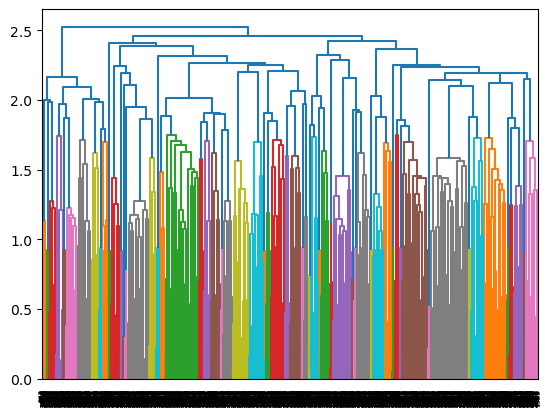

In [622]:
#creating dendogram 
import scipy.cluster.hierarchy as sch
sch.dendrogram(sch.linkage(DATA_X1,method='single'))
plt.show()



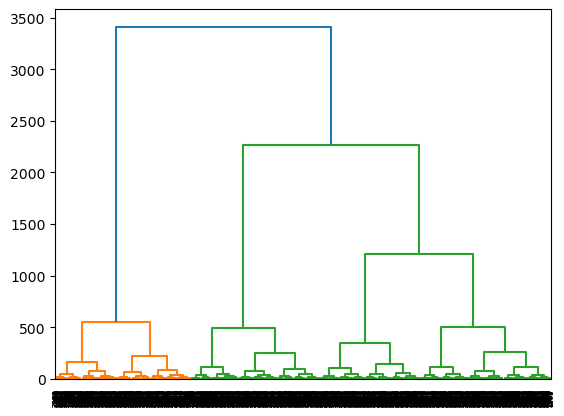

In [623]:
#creating dendogram 
import scipy.cluster.hierarchy as sch
sch.dendrogram(sch.linkage(DATA_X1,method='ward'))
plt.show()



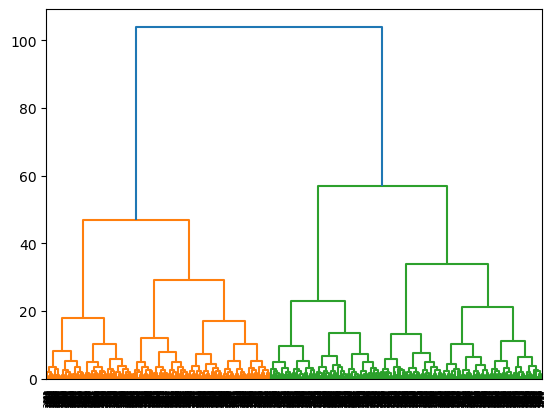

In [624]:
#creating dendogram 
import scipy.cluster.hierarchy as sch
sch.dendrogram(sch.linkage(DATA_X1,method='average'))
plt.show()



In [625]:
#creating cluster with agglomerative

from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')


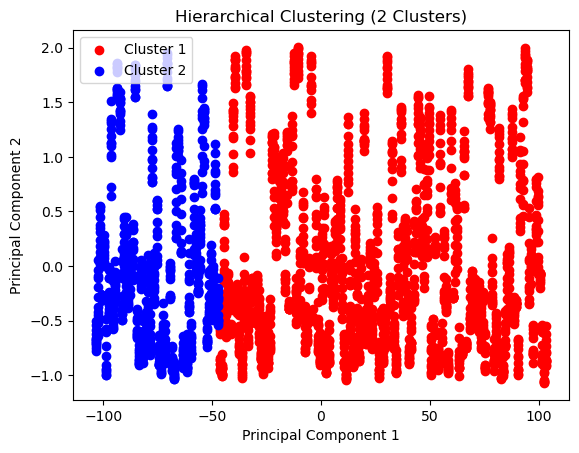

In [626]:
agg_clustering = AgglomerativeClustering(n_clusters=2)  # Adjust the number of clusters as needed
agg1 = agg_clustering.fit_predict(DATA_X1)

plt.scatter(Data_MinMax[agg1 == 0, 0], Data_MinMax[agg1 == 0, 1], c='red', label='Cluster 1')
plt.scatter(Data_MinMax[agg1== 1, 0], Data_MinMax[agg1 == 1, 1], c='blue', label='Cluster 2')
plt.title('Hierarchical Clustering (2 Clusters)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [627]:
from sklearn.metrics import silhouette_score
silhouette_score(DATA_X1, agg1)

0.5158903529287582

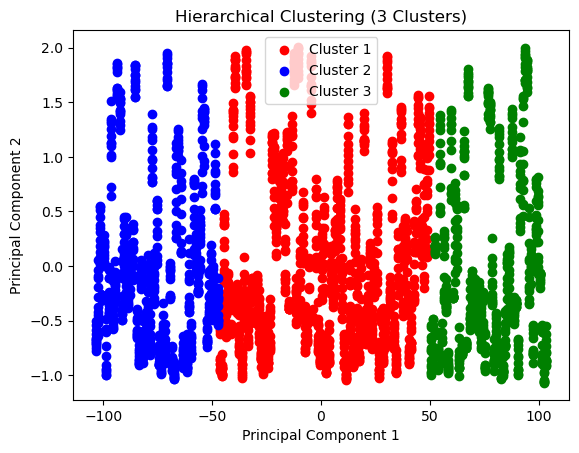

In [628]:
# Clusters with 3 
agg_clustering = AgglomerativeClustering(n_clusters=3)  # Adjust the number of clusters as needed
agg2 = agg_clustering.fit_predict(DATA_X1)

plt.scatter(Data_MinMax[agg2 == 0, 0], Data_MinMax[agg2 == 0, 1], c='red', label='Cluster 1')
plt.scatter(Data_MinMax[agg2== 1, 0], Data_MinMax[agg2 == 1, 1], c='blue', label='Cluster 2')
plt.scatter(Data_MinMax[agg2== 2, 0], Data_MinMax[agg2 == 2, 1], c='green', label='Cluster 3')

plt.title('Hierarchical Clustering (3 Clusters)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [629]:
from sklearn.metrics import silhouette_score
silhouette_score(DATA_X1, agg2)

0.5362547443485064

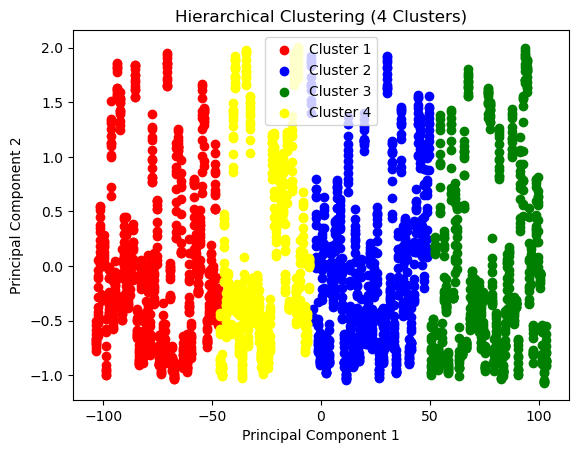

In [630]:
# with cluster 4

# Clusters with 3 
agg_clustering = AgglomerativeClustering(n_clusters=4)  # Adjust the number of clusters as needed
agg3 = agg_clustering.fit_predict(DATA_X1)

plt.scatter(Data_MinMax[agg3 == 0, 0], Data_MinMax[agg3 == 0, 1], c='red', label='Cluster 1')
plt.scatter(Data_MinMax[agg3== 1, 0], Data_MinMax[agg3 == 1, 1], c='blue', label='Cluster 2')
plt.scatter(Data_MinMax[agg3== 2, 0], Data_MinMax[agg3 == 2, 1], c='green', label='Cluster 3')
plt.scatter(Data_MinMax[agg3== 3, 0], Data_MinMax[agg3 == 3, 1], c='yellow', label='Cluster 4')

plt.title('Hierarchical Clustering (4 Clusters)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [631]:
from sklearn.metrics import silhouette_score
silhouette_score(DATA_X1, agg3)

0.5573354843017138

# Model Building With Kmeans

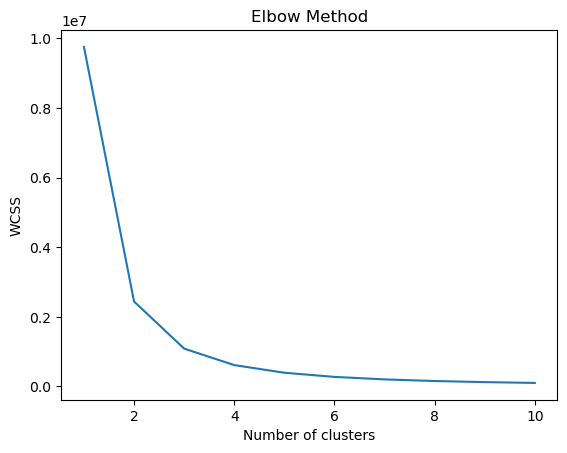

In [632]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,random_state=42)
    kmeans.fit(DATA_X1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

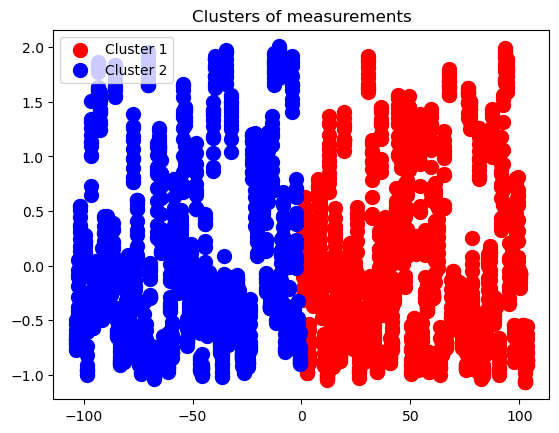

In [633]:
#tring with cluster value as 2
Kmeans11=KMeans(n_clusters=2,init='k-means++',random_state=42)
df1_predicted=Kmeans11.fit_predict(DATA_X1)

plt.scatter(Data_MinMax[df1_predicted == 0, 0], Data_MinMax[df1_predicted == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(Data_MinMax[df1_predicted == 1, 0], Data_MinMax[df1_predicted == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.title('Clusters of measurements')
plt.legend()
plt.show()

In [634]:
ss1 = silhouette_score(DATA_X1, df1_predicted)
print('Silhouette Score for K-means clustring :',ss1)

Silhouette Score for K-means clustring : 0.6254961924339463


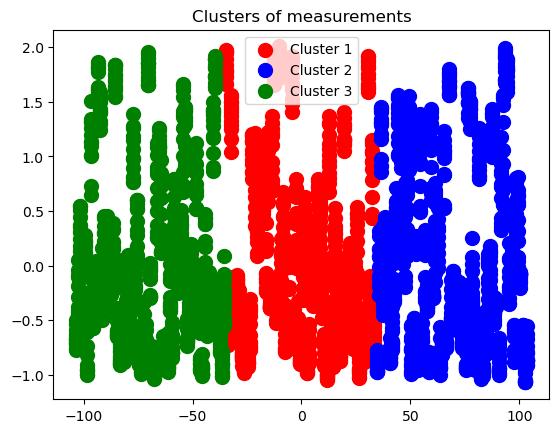

In [635]:
#tring with cluster value as 3
#tring with cluster value as 2
Kmeans11=KMeans(n_clusters=3,init='k-means++',random_state=42)
df2_predicted=Kmeans11.fit_predict(DATA_X1)

plt.scatter(Data_MinMax[df2_predicted == 0, 0], Data_MinMax[df2_predicted == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(Data_MinMax[df2_predicted == 1, 0], Data_MinMax[df2_predicted == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(Data_MinMax[df2_predicted == 2, 0], Data_MinMax[df2_predicted == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

plt.title('Clusters of measurements')
plt.legend()
plt.show()

In [636]:
ss2 = silhouette_score(DATA_X1, df2_predicted) 
print('Silhouette Score for K-means clustring :',ss2)

Silhouette Score for K-means clustring : 0.5876611870876817


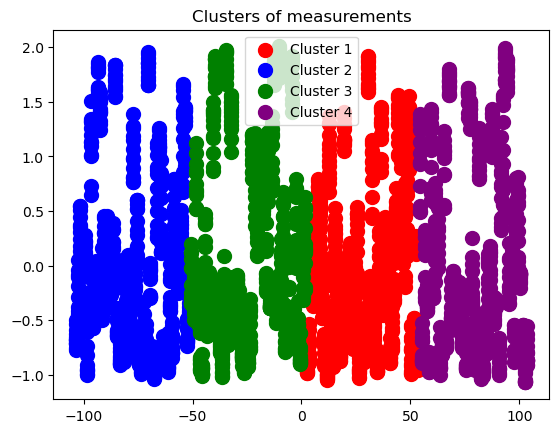

In [637]:
#with 4 clusters
Kmeans11 = KMeans(n_clusters=4, init='k-means++', random_state=42)
df2_predicted4 = Kmeans11.fit_predict(DATA_X1)

plt.scatter(Data_MinMax[df2_predicted4 == 0, 0], Data_MinMax[df2_predicted4 == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(Data_MinMax[df2_predicted4 == 1, 0], Data_MinMax[df2_predicted4 == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(Data_MinMax[df2_predicted4 == 2, 0], Data_MinMax[df2_predicted4 == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(Data_MinMax[df2_predicted4 == 3, 0], Data_MinMax[df2_predicted4 == 3, 1], s=100, c='purple', label='Cluster 4')

plt.title('Clusters of measurements')
plt.legend()
plt.show()


In [638]:
ss2 = silhouette_score(DATA_X1, df2_predicted4)
print('Silhouette Score for K-means clustring :',ss2)

Silhouette Score for K-means clustring : 0.5678064648432113


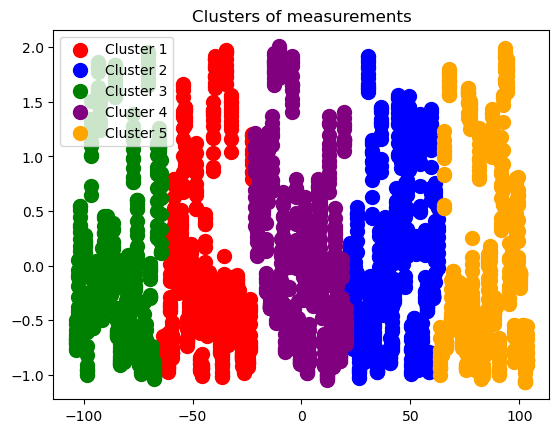

In [640]:
#with 5 clusters
Kmeans11 = KMeans(n_clusters=5, init='k-means++', random_state=42)
df2_predicted5 = Kmeans11.fit_predict(DATA_X1)

plt.scatter(Data_MinMax[df2_predicted5 == 0, 0], Data_MinMax[df2_predicted5 == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(Data_MinMax[df2_predicted5 == 1, 0], Data_MinMax[df2_predicted5 == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(Data_MinMax[df2_predicted5 == 2, 0], Data_MinMax[df2_predicted5 == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(Data_MinMax[df2_predicted5 == 3, 0], Data_MinMax[df2_predicted5 == 3, 1], s=100, c='purple', label='Cluster 4')
plt.scatter(Data_MinMax[df2_predicted5 == 4, 0], Data_MinMax[df2_predicted5 == 4, 1], s=100, c='orange', label='Cluster 5')

plt.title('Clusters of measurements')
plt.legend()
plt.show()


In [641]:
ss2 = silhouette_score(DATA_X1, df2_predicted5)
print('Silhouette Score for K-means clustring :',ss2)

Silhouette Score for K-means clustring : 0.5548247758447276


# Model Building of DBSCAN

In [642]:
from sklearn.cluster import DBSCAN
db1 = DBSCAN() # default eps=0.5, min_samples=5
dbb1=db1.fit_predict(DATA_X1)

silhouette_score(DATA_X1,dbb1)

0.42046358788522364

In [670]:
db2 = DBSCAN(eps=1,min_samples=2)
dbb2=db2.fit_predict(DATA_X1)
silhouette_score(DATA_X1,dbb2)

0.629838188462592

In [672]:
db3 = DBSCAN(eps=1,min_samples=3)
dbb3=db3.fit_predict(DATA_X1)
silhouette_score(DATA_X1,dbb3)

0.6280888008012552

In [673]:
db4 = DBSCAN(eps=1,min_samples=4)
dbb4=db4.fit_predict(DATA_X1)
silhouette_score(DATA_X1,dbb4)

0.6274137493669975

In [676]:
print("KMeans with 2 clusters:", silhouette_score(DATA_X1, df1_predicted))
print("KMeans with 3 clusters:", silhouette_score(DATA_X1, df2_predicted))
print("KMeans with 4 clusters:", silhouette_score(DATA_X1, df2_predicted4))
print("KMeans with 4 clusters:", silhouette_score(DATA_X1, df2_predicted5))

print("Hierarchical clustering with 2 clusters:", silhouette_score(DATA_X1,agg1))
print("Hierarchical clustering with 3 clusters:", silhouette_score(DATA_X1,agg2))
print("Hierarchical clustering with 4 clusters:", silhouette_score(DATA_X1,agg3))
print("DBSCAN with default epsilon(0.5):",silhouette_score(DATA_X1,dbb1))
print("DBSCAN with 2 min samples:",silhouette_score(DATA_X1,dbb2))
print("DBSCAN with 3 min samples:",silhouette_score(DATA_X1,dbb3))
print("DBSCAN with 4 min samples:",silhouette_score(DATA_X1,dbb4))


KMeans with 2 clusters: 0.6254961924339463
KMeans with 3 clusters: 0.5876611870876817
KMeans with 4 clusters: 0.5678064648432113
KMeans with 4 clusters: 0.5678064648432113
Hierarchical clustering with 2 clusters: 0.5158903529287582
Hierarchical clustering with 3 clusters: 0.5362547443485064
Hierarchical clustering with 4 clusters: 0.5573354843017138
DBSCAN with default epsilon(0.5): 0.42046358788522364
DBSCAN with 2 min samples: 0.629838188462592
DBSCAN with 3 min samples: 0.6280888008012552
DBSCAN with 4 min samples: 0.6274137493669975
